# `Capstone Project 3 Daegu Apartment`

by `Fatika Rahma Sanjaya`

# Daftar Isi
1. [Context](#Context)
2. [Problem Statement](#Problem-Statement)
3. [Analytics Approach](#Analytics-Approach)
4. [Metric Evaluation](#Metrics-Evaluation)
3. [Data Understanding](#Data-Understanding)
4. [Feature Engineering](#Feature-Engineering)
5. [Modelling](#Modelling)
6. [Conclusion](#Conclusion)
7. [Recommendation](#Recommendation)

# Context

Daegu, Korea Selatan, merupakan salah satu kota yang mengalami pertumbuhan ekonomi dan perkotaan yang pesat dalam beberapa tahun terakhir. Sebagai salah satu kota terbesar di Korea Selatan, Daegu menarik banyak penduduk dan pendatang yang mencari peluang ekonomi dan pendidikan tinggi. Seiring dengan pertumbuhan ini, kebutuhan akan perumahan, termasuk apartemen, juga meningkat secara signifikan.

Pasar apartemen di Daegu menawarkan berbagai tipe unit, mulai dari apartemen mewah hingga apartemen sederhana, dengan berbagai fasilitas dan lokasi yang beragam. Para pembeli apartemen memiliki beragam preferensi dan kriteria, seperti aksesibilitas ke transportasi publik, keberadaan fasilitas umum, dan kualitas lingkungan sekitar.

Masalah Penetapan Harga Apartment:
Meskipun permintaan akan apartemen terus meningkat, penetapan harga apartemen di Daegu tetap menjadi tantangan. Para pemilik apartemen sering kali menghadapi kesulitan dalam menetapkan harga yang sesuai dengan nilai pasar. Jika harga yang ditetapkan terlalu tinggi, dapat sulit bagi mereka untuk menarik pembeli potensial. Di sisi lain, menetapkan harga terlalu rendah dapat mengakibatkan kerugian finansial bagi pemilik apartemen.

Faktor-faktor yang memengaruhi penetapan harga apartemen di Daegu sangatlah kompleks dan beragam, termasuk lokasi, fasilitas di sekitarnya, aksesibilitas transportasi, kualitas bangunan, dan tren pasar properti lokal. Oleh karena itu, diperlukan pendekatan yang sistematis dan akurat untuk memprediksi harga apartemen yang memperhitungkan berbagai variabel ini.

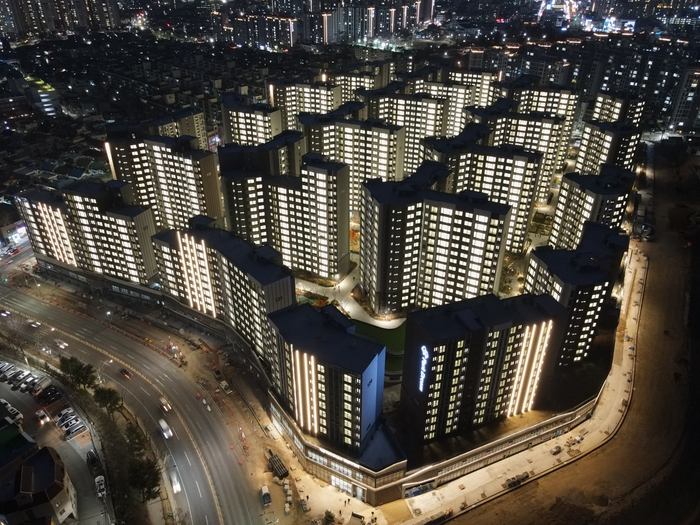
Source Image: https://www.mk.co.kr/en/realestate/10969405

## Problem Statement

Pasar apartemen di Daegu, Korea Selatan, menawarkan berbagai tipe unit dengan beragam fasilitas dan lokasi. Namun, penetapan harga apartemen tetap menjadi tantangan bagi pemilik properti. Penetapan harga yang tidak tepat dapat mengakibatkan kerugian finansial atau kesulitan dalam menarik pembeli. Faktor-faktor kompleks seperti lokasi, fasilitas di sekitarnya, dan tren pasar mempengaruhi proses penetapan harga. `Oleh karena itu, diperlukan pendekatan yang sistematis untuk memprediksi harga apartemen yang akurat.`

## Stakeholder

Stakeholder utama dari proyek ini adalah `agen properti` yang bertanggung jawab dalam membantu pemilik properti menetapkan harga jual apartemen. Dengan bantuan model ini, mereka dapat membuat keputusan harga yang lebih tepat dan kompetitif, yang pada akhirnya dapat meningkatkan keuntungan dan kepuasan pelanggan.

## Tujuan
Tujuan dari proyek ini adalah untuk mengembangkan model prediksi harga apartemen yang dapat membantu `agen properti` dalam `menetapkan harga` yang sesuai dengan nilai pasar. Dengan menggunakan berbagai fitur yang relevan. Model ini diharapkan dapat memberikan perkiraan harga yang lebih akurat.

## Analytics Approach
Analisis akan dimulai dengan melakukan pengecekan statistik dan eksplorasi data untuk mengidentifikasi fitur yang berpengaruh terhadap harga apartemen. Selanjutnya, dilakukan pembersihan dan pra-pemrosesan data untuk persiapan pemodelan. Kemudian, dilakukan pelatihan data menggunakan beberapa model benchmark untuk membandingkan tingkat error dari masing-masing model dan memilih model dengan tingkat error terendah.

## Metric Evaluation
Metrik evaluasi yang digunakan untuk mengukur performa model machine learning adalah `RMSE, MAE, dan MAPE`.

- `Root Mean Square Error (RMSE)`: RMSE mengukur kesalahan model regresi dengan menghitung akar kuadrat rata-rata dari perbedaan antara nilai yang diprediksi dan nilai sebenarnya. RMSE memberikan bobot lebih besar pada kesalahan besar, sehingga kesalahan besar akan lebih berdampak pada nilai RMSE.


- `Mean Absolute Error (MAE)`: MAE mengukur rata-rata dari selisih absolut antara nilai yang diprediksi dan nilai sebenarnya, memberikan bobot yang sama pada semua kesalahan. MAE cocok untuk data yang memiliki outliers.


- `Mean Absolute Percentage Error (MAPE)`: MAPE mengukur kesalahan model dalam bentuk persentase dari kesalahan relatif terhadap nilai sebenarnya, memberikan interpretasi yang mudah dalam bentuk persentase kesalahan.


Semakin kecil nilai RMSE, MAE, dan MAPE, semakin baik model dalam memprediksi data sebenarnya. MAPE khususnya berguna untuk menginterpretasikan hasil error dalam bentuk persentase, sehingga mudah dipahami.

In [1]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read data
df=pd.read_csv('data_daegu_apartment.csv')
display(df.head(), df.tail())

HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
0    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1    terraced  10min~15min  Kyungbuk_uni_hospital                      1.0   
2       mixed  15min~20min       Chil-sung-market                      1.0   
3       mixed   5min~10min                Bangoge                      5.0   
4    terraced       0-5min                Sin-nam                      0.0   

   N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
0                               3.0                         2.0   
1                               5.0                         1.0   
2                               7.0                         3.0   
3                               5.0                         4.0   
4                               1.0                         2.0   

   N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  SalePrice  
0                  1270.0       2007                 10       1387     346017  
1                     0.0       1986                  4        914     150442  
2                    56.0       1997                  5        558      61946  
3                   798.0       2005                  7        914     165486  
4                   536.0       2006                  5       1743     311504

HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
4118    terraced       0-5min                Sin-nam                      0.0   
4119       mixed  15min~20min              Myung-duk                      5.0   
4120       mixed  15min~20min              Myung-duk                      5.0   
4121    corridor   5min~10min                  Daegu                      2.0   
4122    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   

      N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
4118                               3.0                         2.0   
4119                               6.0                         5.0   
4120                               6.0                         5.0   
4121                               5.0                         0.0   
4122                               3.0                         2.0   

      N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  \
4118                   475.0       2008                  8        914   
4119                   536.0       1993                  4       1451   
4120                   536.0       1993                  4       1761   
4121                    76.0       1985                  3        676   
4122                  1270.0       2007                 10        868   

      SalePrice  
4118     323008  
4119     242477  
4120     168141  
4121      73451  
4122     250442

# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


> `Data Apartment Daegu:`<br>
    - 4.123 baris, 11 kolom<br>
    - 8 kolom dengan tipe data numerik, 3 kolom dengan tipe data string<br>
    
    
  - `Data Numerical`
     1. `Discrete`: 
      - N_FacilitiesNearBy(ETC)
      - N_FacilitiesNearBy(PublicOffice)
      - N_SchoolNearBy(University)
      - N_Parkinglot(Basement)
      - N_FacilitiesInApt
        
     2. `Continue`: 
     - YearBuilt
     - Size(sqft)
     - SalePrice<br><br>
     
 - `Data Categorical`
 
      1. `Ordinal`: TimeToSubway
      
      2. `Nominal`: Hallway Type, SubwayStation

In [4]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

> ` tidak ada null values`

In [5]:
# Kolom, Jumlah Unique Values dan Contoh Unique Values

pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)

def unique_data(df):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique()[:5] for col in (df.columns)]  
    return data_unique
unique_data(df)

Columns  Unique Count  \
0                        HallwayType             3   
1                       TimeToSubway             5   
2                      SubwayStation             8   
3            N_FacilitiesNearBy(ETC)             4   
4   N_FacilitiesNearBy(PublicOffice)             8   
5         N_SchoolNearBy(University)             6   
6             N_Parkinglot(Basement)            20   
7                          YearBuilt            16   
8                  N_FacilitiesInApt             9   
9                          Size(sqf)            89   
10                         SalePrice           838   

                                                                     Unique  
0                                               [terraced, mixed, corridor]  
1        [0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]  
2   [Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang]  
3                                                      [0.0, 1.0, 5.0, 2.0]  
4                                                 [3.0, 5.0, 7.0, 1.0, 4.0]  
5                                                 [2.0, 1.0, 3.0, 4.0, 5.0]  
6                                         [1270.0, 0.0, 56.0, 798.0, 536.0]  
7                                            [2007, 1986, 1997, 2005, 2006]  
8                                                          [10, 4, 5, 7, 2]  
9                                              [1387, 914, 558, 1743, 1334]  
10                                  [346017, 150442, 61946, 165486, 311504]

### **Data Dictionary**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Tipe Apartemen |
| TimeToSubway | Object | Jarak terdekat ke stasiun kereta bawah tanah |
| SubwayStation | Object | Nama Stasiun Kereta |
| N_FacilitiesNearBy(ETC) | Float | Jumlah Fasilitas Terdekat |
| N_FacilitiesNearBy(PublicOffice) | Float | Jumlah Fasilitas Pemerintahan Terdekat |
| N_SchoolNearBy(University) | Float | Jumlah Kampus Terdekat |
| N_Parkinglot(Basement) | Float | Jumlah Parkir Bawah Tanah |
| YearBuilt | Integer | Tahun Apartemen Dibangun |
| N_FacilitiesInApt | Integer | Jumlah Fasilitas di Apartemen |
| Size(sqf) | Integer | Ukuran Apartemen (dalam kaki persegi) |
| SalePrice | Integer | Harga Apartemen (dalam WON) |


In [6]:
print('Descriptive Stats for Number')
display(df.describe(include='number'))
print('Descriptive Stats for Object')
display(df.describe(include='object'))

Descriptive Stats for Number


N_FacilitiesNearBy(ETC)  N_FacilitiesNearBy(PublicOffice)  \
count              4123.000000                       4123.000000   
mean                  1.930876                          4.135338   
std                   2.198832                          1.802640   
min                   0.000000                          0.000000   
25%                   0.000000                          3.000000   
50%                   1.000000                          5.000000   
75%                   5.000000                          5.000000   
max                   5.000000                          7.000000   

       N_SchoolNearBy(University)  N_Parkinglot(Basement)    YearBuilt  \
count                 4123.000000             4123.000000  4123.000000   
mean                     2.746301              568.979141  2002.999757   
std                      1.496610              410.372742     8.905768   
min                      0.000000                0.000000  1978.000000   
25%                      2.000000              184.000000  1993.000000   
50%                      2.000000              536.000000  2006.000000   
75%                      4.000000              798.000000  2008.000000   
max                      5.000000             1321.000000  2015.000000   

       N_FacilitiesInApt    Size(sqf)      SalePrice  
count        4123.000000  4123.000000    4123.000000  
mean            5.817851   954.630851  221767.926995  
std             2.340507   383.805648  106739.839945  
min             1.000000   135.000000   32743.000000  
25%             4.000000   644.000000  144752.000000  
50%             5.000000   910.000000  209734.000000  
75%             7.000000  1149.000000  291150.000000  
max            10.000000  2337.000000  585840.000000

Descriptive Stats for Object


HallwayType TimeToSubway          SubwayStation
count         4123         4123                   4123
unique           3            5                      8
top       terraced       0-5min  Kyungbuk_uni_hospital
freq          2528         1953                   1152

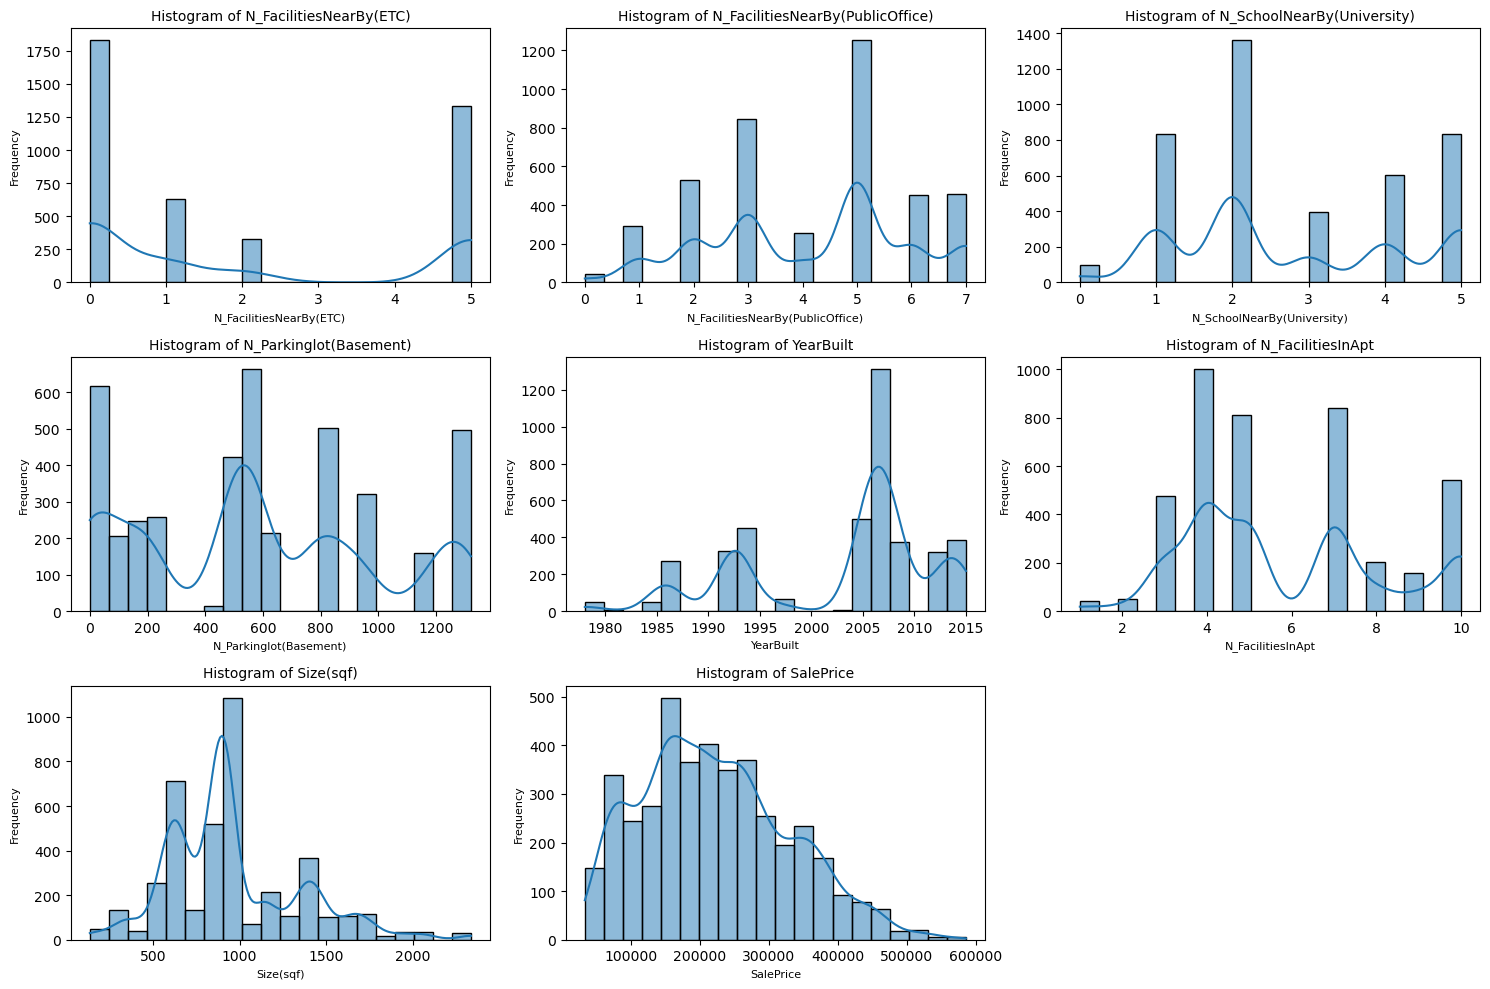

In [7]:
# Histogram Distribusi Data berdasarkan kolom numerik
# Memilih kolom-kolom numerik
df_num = df.select_dtypes(include=['number'])
# Menentukan ukuran subplot
num_cols = 3
num_rows = (len(df_num.columns) + num_cols - 1) // num_cols

# Membuat subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Membuat histogram untuk setiap kolom numerik
for i, col in enumerate(df_num.columns):
    sns.histplot(data=df_num[col], kde=True, bins=20, ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(f'Histogram of {col}', fontsize=10)
    axes[i // num_cols, i % num_cols].set_xlabel(col, fontsize=8)
    axes[i // num_cols, i % num_cols].set_ylabel('Frequency', fontsize=8)

# Menghapus subplot yang kosong
for i in range(len(df_num.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [8]:
#Cek Distribusi Data dengan Normal Test
numerical = df.select_dtypes(include='number')
from scipy.stats import normaltest

for i in numerical.columns :
    stats, p_val = normaltest(numerical[i])
    if p_val >= 0.05 :
        print (f"{i} data terdistribusi normal")
    else :
        print (f"{i} data tidak terdistribusi normal")

N_FacilitiesNearBy(ETC) data tidak terdistribusi normal
N_FacilitiesNearBy(PublicOffice) data tidak terdistribusi normal
N_SchoolNearBy(University) data tidak terdistribusi normal
N_Parkinglot(Basement) data tidak terdistribusi normal
YearBuilt data tidak terdistribusi normal
N_FacilitiesInApt data tidak terdistribusi normal
Size(sqf) data tidak terdistribusi normal
SalePrice data tidak terdistribusi normal


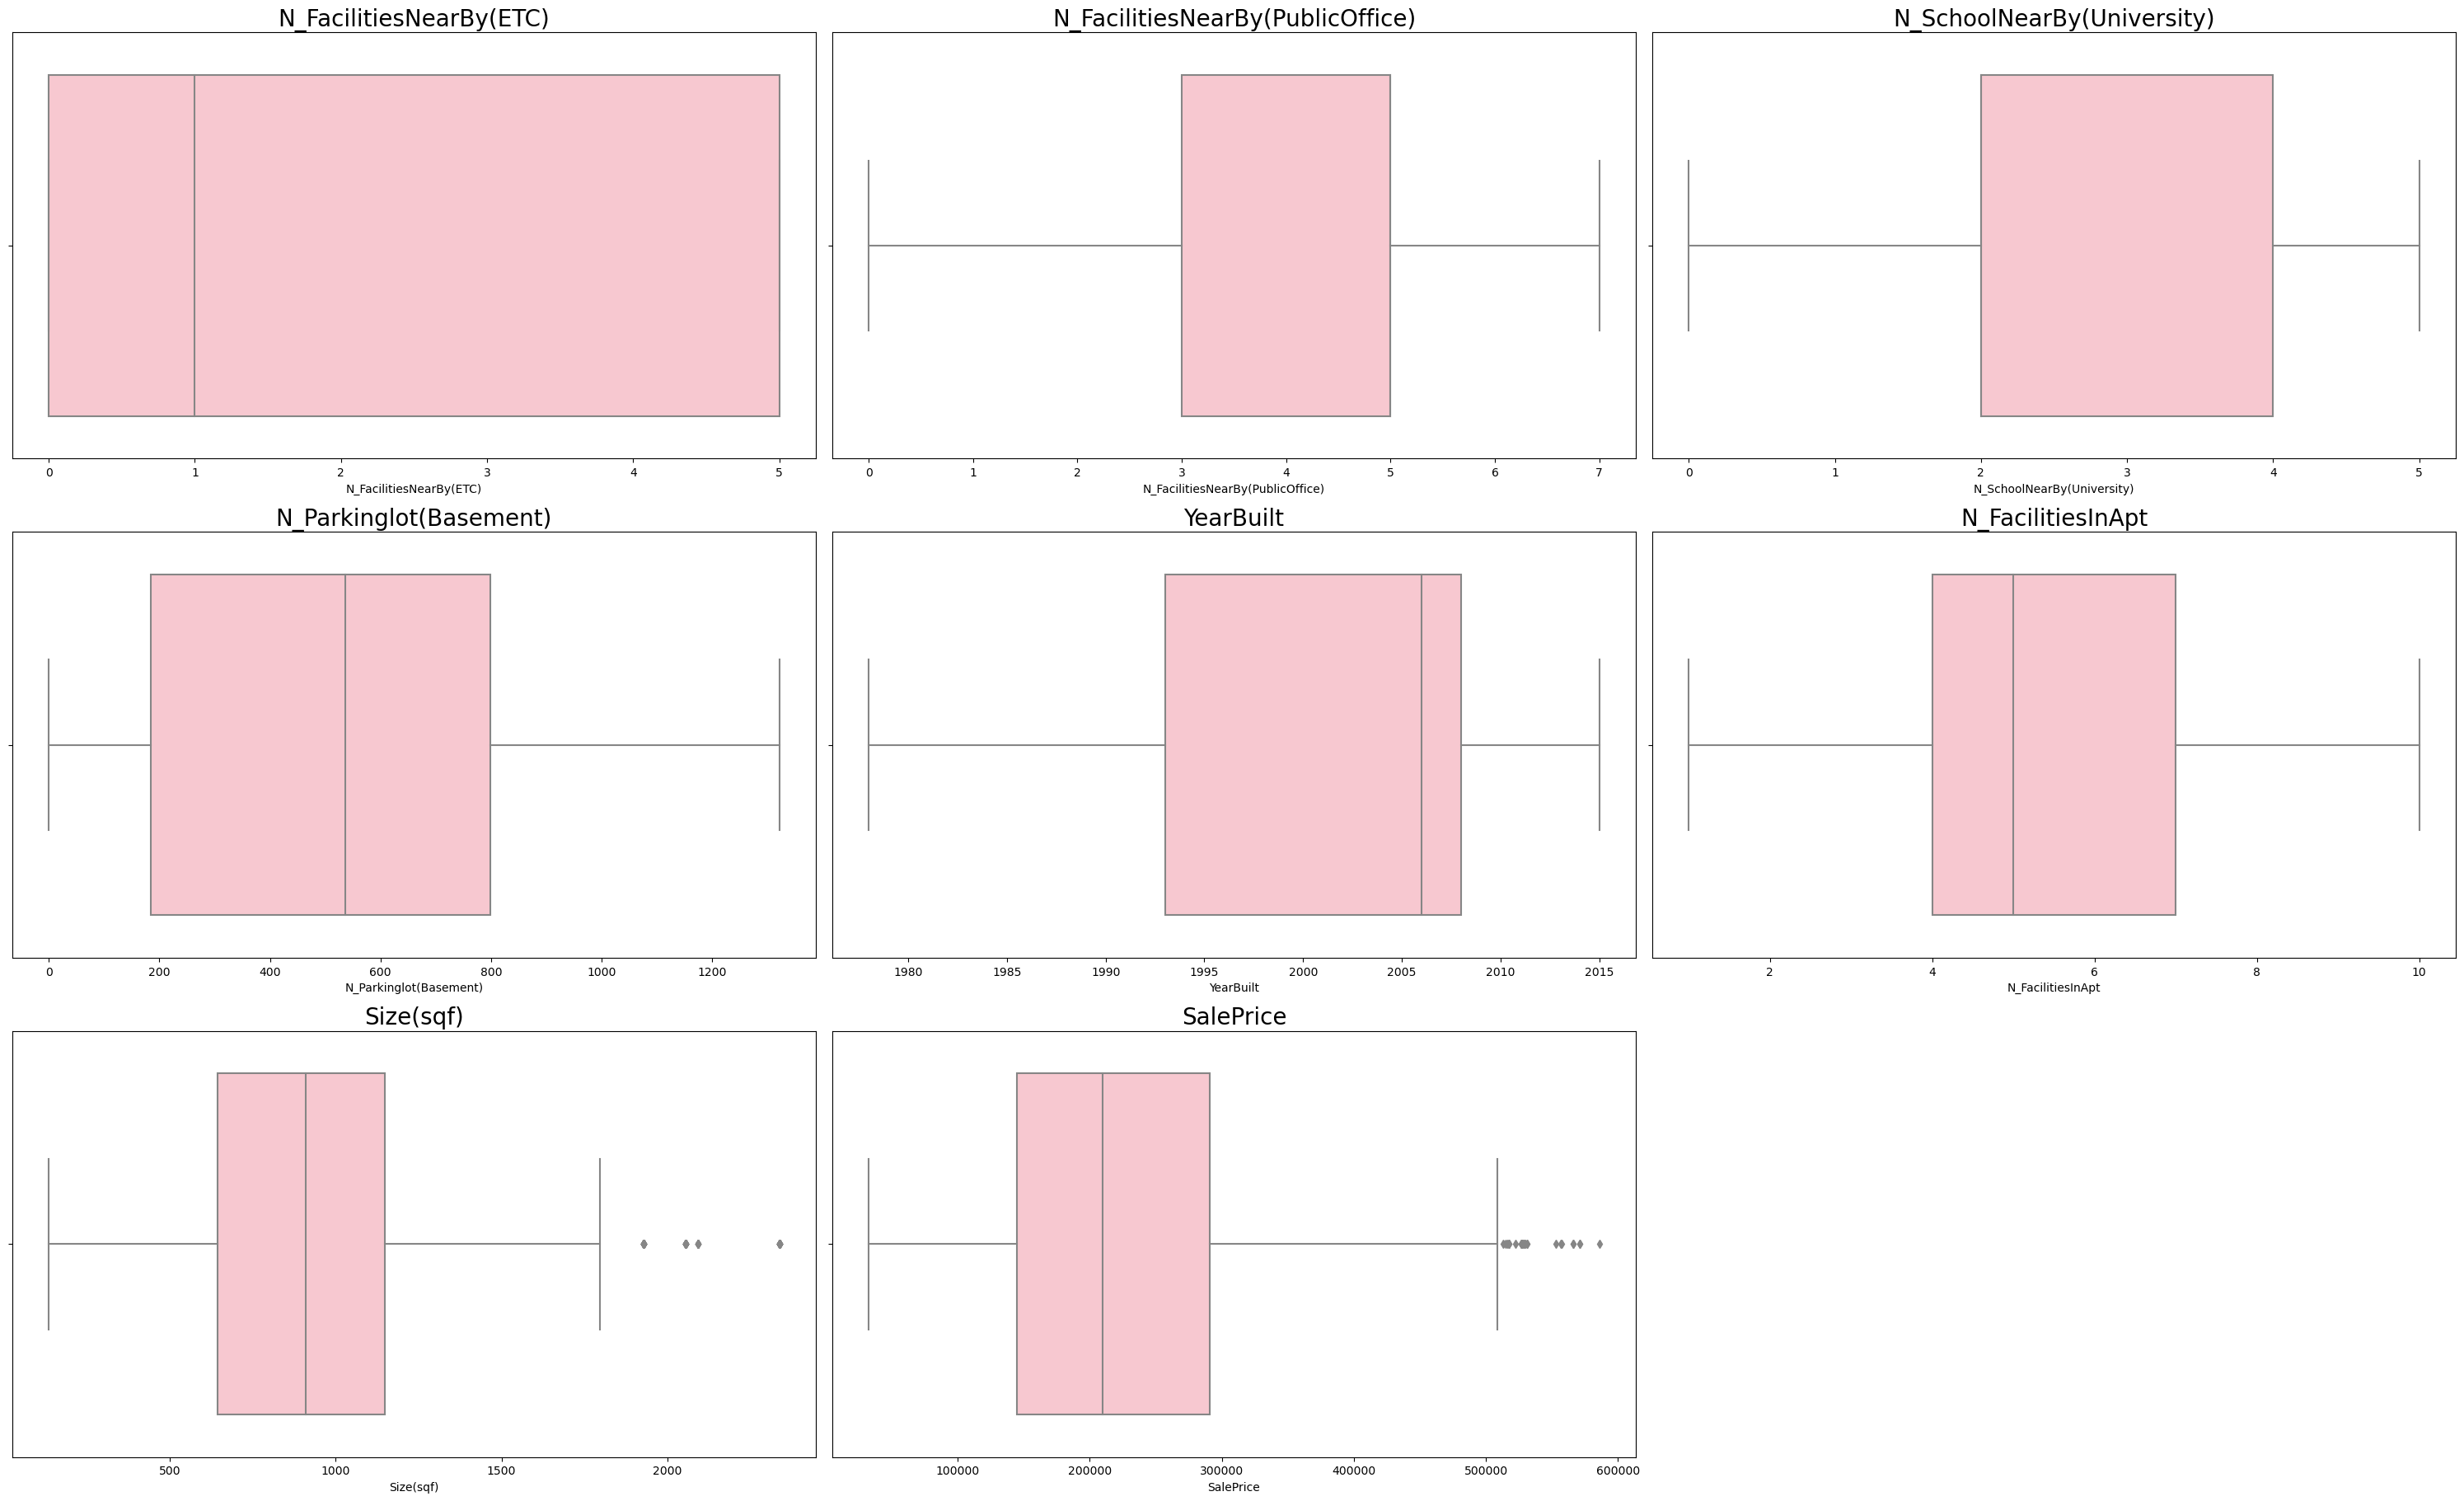

In [9]:
plt.figure(figsize=(30, 30))
plotnumber = 1
num_features = df.select_dtypes(include='number').columns

for feature in num_features:
    ax = plt.subplot(5, 3, plotnumber)
    sns.boxplot(data=df,x=feature,color='pink')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

> dari boxplot per kolom numerik diatas, dapat diketahui bahwa `Size(sf)` dan `SalePrice` memiliki data outlier. Dikarenakan data tidak terdistribusi normal, mengecek outlier dengan menentukan IQR.

In [10]:
# df.columns

In [ ]:
# Melihat Outlier dari IQR

In [11]:
# IQR
# identify the outliers of the variable price
Q1 = df['Size(sqf)'].quantile(.25)
Q3 = df['Size(sqf)'].quantile(.75)
IQR = Q3 - Q1
print('IQR of the variable size: ', IQR)

# define the limits                                      
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print('Upper limit of size: ', upper_bound)
print('Lower limit of size: ', lower_bound)

IQR of the variable size:  505.0
Upper limit of size:  1906.5
Lower limit of size:  -113.5


In [12]:
print("The original dataset has {} entries".format(df.shape[0]))
print("{} Entries with size above 505".format(len(df[df['Size(sqf)'] > upper_bound])))
print("It represents {:.2f}% from the dataset".format((len(df[df['Size(sqf)'] > upper_bound]) / df.shape[0])*100))

The original dataset has 4123 entries
98 Entries with size above 505
It represents 2.38% from the dataset


Dari domain knowledge terkait luas apartment di Daegu, nyatanya ada data apartment yang luas nya diatas `1.906,5 sqf`. Untuk mewakili data apartment yang memiliki luas diatas `1.906,5 sqf`, data yang dianggap outlier akan tetap dimasukkan kedalam pemodelan prediksi harga apartment Daegu.

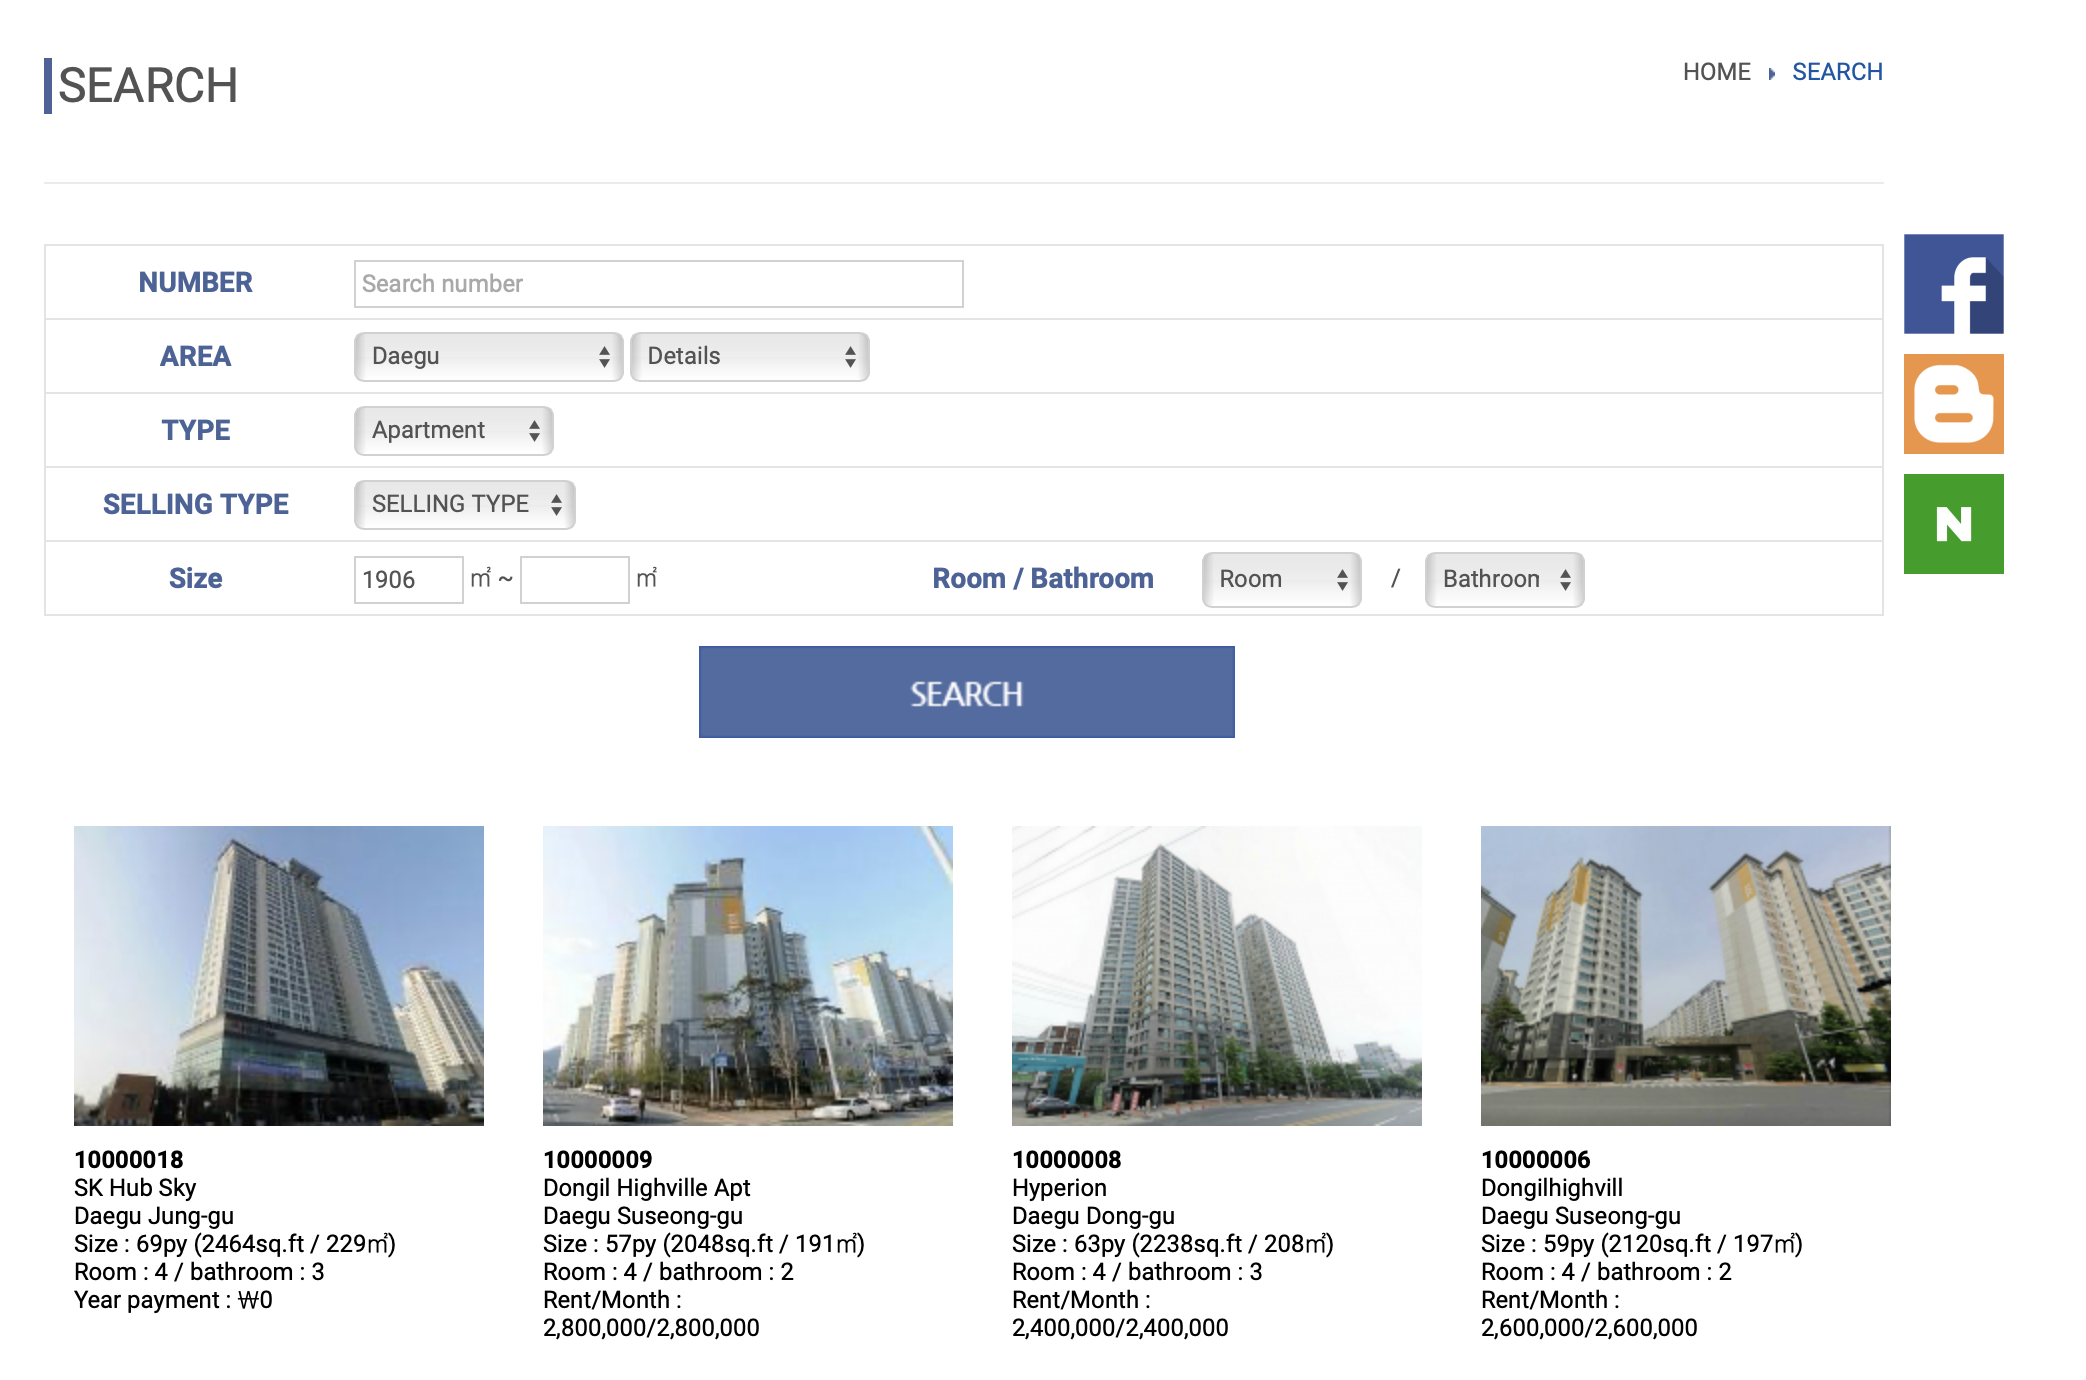
Source: http://realtymyhome.com/contents/search.php?sfl24=&sfl1=Daegu&sfl2=&sfl4=2&sfl7=&sfl3=&sfl51=&sfl10=&sfl11=&sfl10=&sfl11=&sfl12=&sfl13=&sfl17=1906&sfl18=&sfl19=&sfl20=&x=55&y=21

In [13]:
# IQR
# identify the outliers of the variable price
Q1 = df['SalePrice'].quantile(.25)
Q3 = df['SalePrice'].quantile(.75)
IQR = Q3 - Q1
print('IQR of the variable price: ', IQR)

# define the limits                                      
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print('Upper limit of price: ', upper_bound)
print('Lower limit of price: ', lower_bound)

IQR of the variable price:  146398.0
Upper limit of price:  510747.0
Lower limit of price:  -74845.0


In [14]:
print("The original dataset has {} entries".format(df.shape[0]))
print("{} Entries with size above 510747.0".format(len(df[df['SalePrice'] > upper_bound])))
print("It represents {:.2f}% from the dataset".format((len(df[df['SalePrice'] > upper_bound]) / df.shape[0])*100))

The original dataset has 4123 entries
27 Entries with size above 510747.0
It represents 0.65% from the dataset


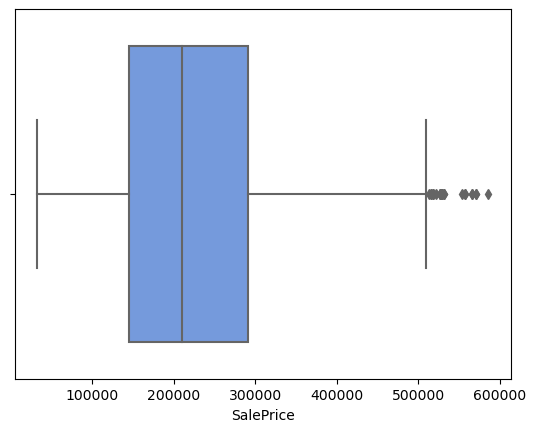

In [15]:
sns.boxplot(x=df['SalePrice'],color='cornflowerblue')
plt.show()

`SalePrice`
Dalam kasus ini, outlier tidak di-drop karena masih merepresentasikan harga asli pasar<br>
Source: https://www.numbeo.com/cost-of-living/in/Daegu


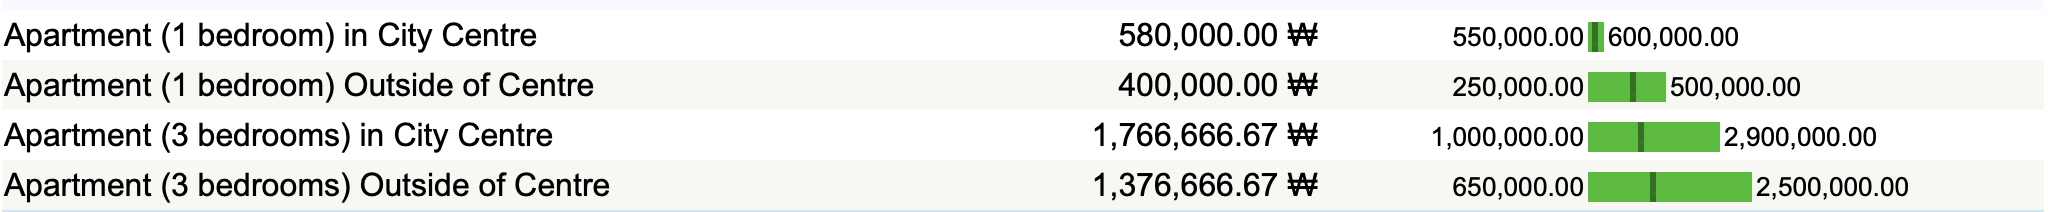

## Duplicate Data

In [3]:
# mengidentifikasi duplikasi data
print(f'Jumlah data duplikat: {df.duplicated().sum()}')
print(f'Persentase Data Duplicate : {round((df.duplicated().sum()/ len(df)*100),2)}%')

Jumlah data duplikat: 1422
Persentase Data Duplicate : 34.49%


In [4]:
df_model = df.drop_duplicates()

num_rows, num_cols = df_model.shape
print(f"Jumlah Baris dan Kolom setelah dilakukan penghapusan duplikasi data :\nJumlah Baris = {num_rows}\nJumlah Kolom: {num_cols}")

Jumlah Baris dan Kolom setelah dilakukan penghapusan duplikasi data :
Jumlah Baris = 2701
Jumlah Kolom: 11


### Alasan menghapus data duplikat:
`1. Menghindari Overfitting`

    Penjelasan: Data duplikat dapat menyebabkan model belajar berlebihan dari data yang sama berulang kali, yang dapat mengakibatkan model overfitting. Model yang overfitting tidak akan mampu menggeneralisasi dengan baik ke data baru, mengurangi performa pada data uji atau data yang belum terlihat.

`2. Meningkatkan Akurasi Model`

    Penjelasan: Dengan menghapus duplikat, kita memastikan setiap titik data unik dan memberikan informasi yang berbeda kepada model. Ini membantu model mempelajari hubungan yang benar antara fitur dan target, sehingga meningkatkan akurasi dan keandalannya.
    
`3. Meningkatkan Kecepatan dan Efisiensi`

    Penjelasan: Data duplikat menambah ukuran dataset tanpa menambah informasi baru, yang dapat memperlambat proses pelatihan model dan meningkatkan kebutuhan komputasi. Menghapus duplikat dapat mengurangi ukuran dataset dan membuat proses pelatihan lebih cepat dan lebih efisien.

`4. Menghindari Bias dalam Data`

    Penjelasan: Data duplikat dapat menyebabkan bias dalam model, karena beberapa titik data akan memiliki lebih banyak pengaruh daripada yang lain. Ini dapat menyebabkan model bias terhadap data duplikat dan kurang representatif terhadap populasi data secara keseluruhan.

`5. Memastikan Kualitas Data`

    Penjelasan: Menghapus duplikat adalah bagian dari memastikan bahwa data yang digunakan berkualitas tinggi. Data yang bersih dan unik lebih mungkin menghasilkan model yang dapat diandalkan dan akurat.

In [5]:
df_model.shape

(2701, 11)

In [6]:
df=df_model

## Explanatory Data Analysis

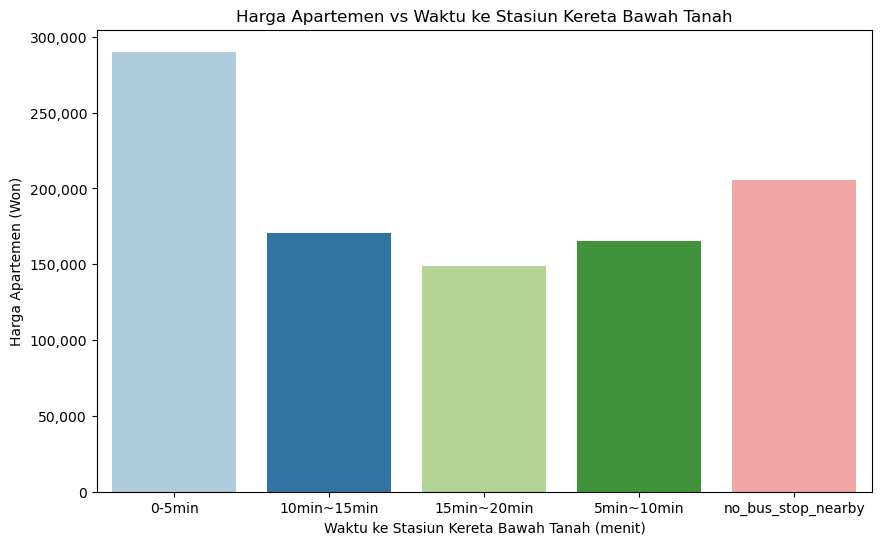

In [20]:
#Sale Price vs Time to Subway 
import matplotlib.ticker as ticker

# Mengelompokkan data berdasarkan TimeToSubway dan menghitung median SalePrice
df_grouped = df.groupby('TimeToSubway')['SalePrice'].median().reset_index()

# Mengurutkan data berdasarkan SalePrice
# df_grouped_sorted = df_grouped.sort_values(by='SalePrice', ascending=False)

# Membuat grafik bar
plt.figure(figsize=(10, 6))
sns.barplot(x='TimeToSubway', y='SalePrice', data=df_grouped, palette='Paired')
plt.title('Harga Apartemen vs Waktu ke Stasiun Kereta Bawah Tanah')
plt.xlabel('Waktu ke Stasiun Kereta Bawah Tanah (menit)')
plt.ylabel('Harga Apartemen (Won)')

# Mengatur format harga apartemen
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


Berdasarkan grafik yang menunjukkan hubungan antara waktu ke stasiun kereta bawah tanah dan harga apartemen, terlihat bahwa median harga apartemen untuk kategori `no_bus_stop_nearby` lebih tinggi dibandingkan beberapa kategori lain yang menunjukkan waktu tempuh ke stasiun.

Ini menunjukkan bahwa `tidak ada hubungan ordinal` yang jelas antara waktu ke stasiun kereta bawah tanah dan harga apartemen. Dengan kata lain, harga apartemen tidak selalu turun atau naik secara konsisten dengan meningkatnya waktu ke stasiun. Oleh karena itu, kita tidak dapat mengasumsikan bahwa fitur ini memiliki hubungan ordinal yang kuat dengan harga apartemen.

Dengan demikian, menggunakan `one hot encoding` untuk fitur ini adalah pendekatan yang tepat karena:

- `Menghindari Misinterpretasi`: One hot encoding menghindari kesalahan interpretasi yang mungkin muncul jika fitur diperlakukan sebagai ordinal.<br>
- `Representasi Lebih Akurat`: Setiap kategori dianggap sebagai entitas terpisah, memungkinkan model untuk menangkap pola yang lebih kompleks dan tidak linier.

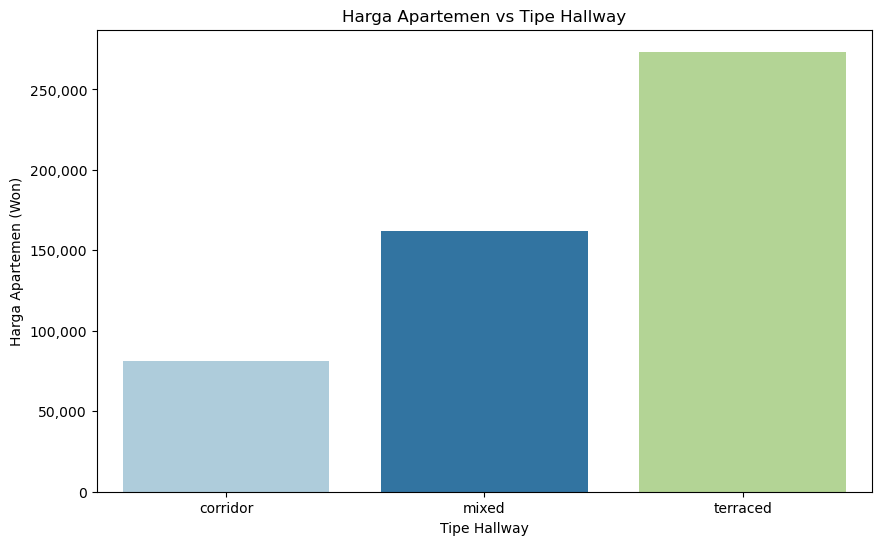

In [21]:
#Hallway Type vs SalePrice

# Mengelompokkan data berdasarkan TimeToSubway dan menghitung median SalePrice
df_grouped = df.groupby('HallwayType')['SalePrice'].median().reset_index()

# Mengurutkan data berdasarkan SalePrice
# df_grouped_sorted = df_grouped.sort_values(by='SalePrice', ascending=False)

# Membuat grafik bar
plt.figure(figsize=(10, 6))
sns.barplot(x='HallwayType', y='SalePrice', data=df_grouped, palette='Paired')
plt.title('Harga Apartemen vs Tipe Hallway')
plt.xlabel('Tipe Hallway')
plt.ylabel('Harga Apartemen (Won)')

# Mengatur format harga apartemen
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

 Dari grafik `Sale Price vs Hallway Type`  menandakan bahwa apartment dengan tipe hallway `terraced` memiliki harga yang lebih tinggi dibandingkan tipe hallway `mixed` serta tipe `corridor`. Maka dari itu untuk kolom `HallwayType` akan dilakukan feature engineering dengan pendekatan `ordinal encoder`.

### Melihat korelasi antar fitur (kolom)

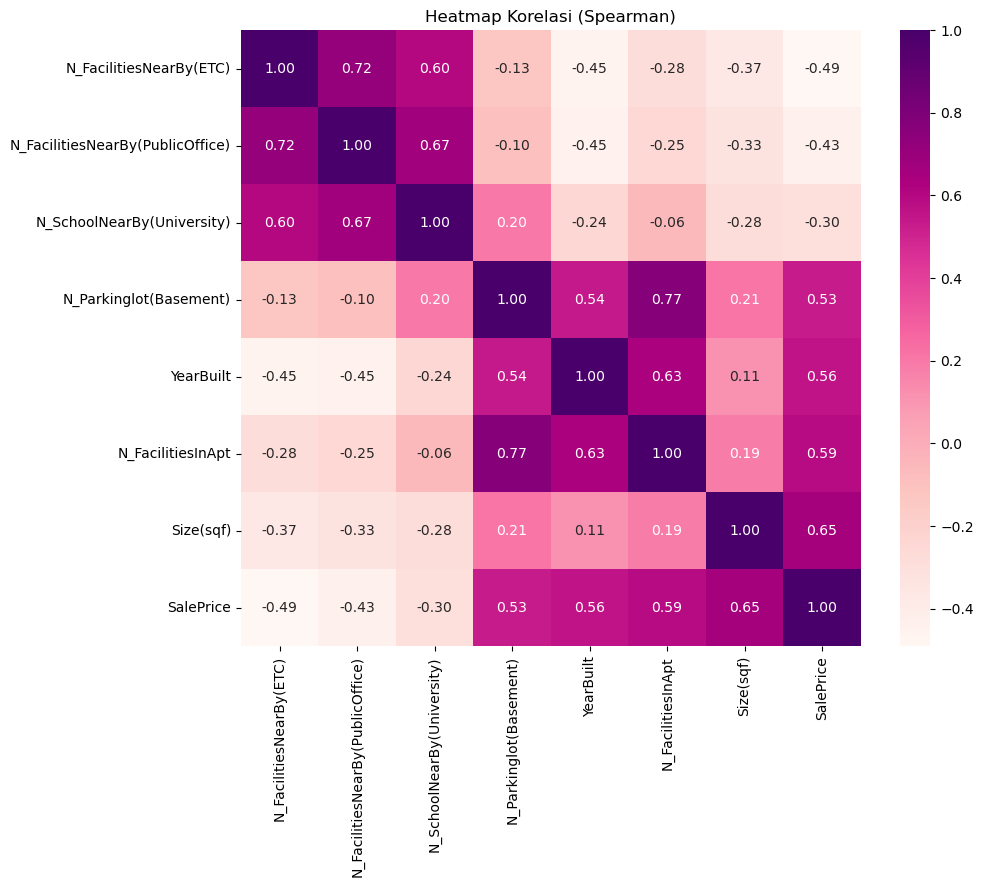

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df_num=df.select_dtypes(include=['number'])
# Hitung matriks korelasi dengan metode Spearman
correlation_matrix = df_num.corr(method='spearman')

palette = sns.diverging_palette(350, 9, n = 300)

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Heatmap Korelasi (Spearman)')
plt.show()


> Terdapat hubungan antara `SalePrice` dengan `Size(sqf), N_FacilitiesInApt, YearBuilt, dan N_Parkinglot(Basement)`

### Cek Multikolinearitas

> Dalam analisis regresi, Variance Inflation Factor (VIF) adalah ukuran yang digunakan untuk mengukur seberapa banyak variabilitas dalam perkiraan koefisien regresi yang disebabkan oleh korelasi tinggi antara variabel independen (predictor) dalam model. VIF yang tinggi menunjukkan adanya multicollinearity, yaitu hubungan yang kuat antara dua atau lebih variabel independen.


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["Nilai VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [24]:
calc_vif(df[['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)']])

Variables  Nilai VIF
0           N_FacilitiesNearBy(ETC)   5.975305
1  N_FacilitiesNearBy(PublicOffice)  13.896514
2        N_SchoolNearBy(University)  16.257819
3            N_Parkinglot(Basement)  11.266549
4                         YearBuilt  30.259604
5                 N_FacilitiesInApt  26.112948
6                         Size(sqf)   8.666827

Multikolinearitas terjadi ketika dua atau lebih variabel independen dalam model memiliki hubungan yang kuat di antara mereka, yang dapat mengganggu interpretasi model. `Nilai VIF di atas 10` sering kali dianggap sebagai indikasi adanya `multikolinearitas` yang signifikan.

Dalam kasus ini, beberapa variabel memiliki nilai VIF yang cukup tinggi, menunjukkan kemungkinan adanya multikolinearitas. Tindakan yang dapat diambil untuk mengatasi masalah ini:

1. **Transformasi Variabel:**

> `Scaling`: Dengan melakukan scaling, seperti menggunakan robust scaling, dapat menyesuaikan skala variabel numerik sehingga mereka memiliki variasi yang serupa. Ini membantu menghindari dominasi variabel dengan skala yang besar dan memastikan konvergensi yang lebih cepat pada model.

> `Encoding`: Encoding variabel kategori, seperti menggunakan one-hot encoding untuk variabel kategori nominal atau ordinal encoding untuk variabel kategori ordinal, memungkinkan untuk merepresentasikan informasi kategori dengan cara yang lebih efisien. Ini membantu menghindari masalah multikolinearitas yang dapat timbul dari representasi berlebihan dari kategori tertentu.

2. **`Benchmark Model`:**

> Melakukan benchmarking model melibatkan pelatihan beberapa model yang berbeda dan mengevaluasi kinerja mereka secara komparatif.Pemilihan model yang beragam membantu dalam mengevaluasi dampak teknik pre-processing dan menemukan pendekatan terbaik untuk mengurangi multikolinearitas dalam konteks model.


Maka dari itu, dengan menggabungkan teknik transformasi variabel yang tepat dan benchmarking model, kita dapat mengoptimalkan penanganan multikolinearitas dalam pemodelan.

# Feature Engineering

`Feature engineering` adalah proses mengubah data mentah menjadi fitur yang lebih representatif untuk meningkatkan kinerja model machine learning. Tujuan utamanya adalah menciptakan variabel yang mempermudah model dalam memahami pola data, sehingga dapat membuat prediksi yang lebih akurat

In [25]:
# df.columns

In [26]:
# df['SubwayStation'].unique()

### `Scaling`

Pada tahap ini selain encoding juga melakukan scaling pada data numerik, Jenis scaling yang digunakan adalah `Robust Scaler` karena data Apartment Daegu memiliki outlier pada kolom size dan saleprice. Selain itu tipe scaling `Robust Scaler` tidak akan terpengaruh oleh outlier.

### `Encoding`
Encoding yang dilakukan pada preprocessing ini yaitu Oridinal Encoder pada `HallwayType` dan OneHot Encoder untuk fitur `TimeToSubway` dan `SubwayStation`.

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from category_encoders import BinaryEncoder

# Memisahkan fitur dan target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Memisahkan kolom numerikal dan kategorikal
numerical_cols = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 
                  'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt', 
                  'N_FacilitiesInApt', 'Size(sqf)']
ordinal_cols = ['HallwayType']
onehot_cols = ['TimeToSubway', 'SubwayStation']


# Preprocessing untuk data numerikal, ordinal, dan one hot
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
       ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('cat', categorical_transformer, onehot_cols)
    ], remainder='passthrough')


In [8]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Inisialisasi model XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Buat pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', xgb_model)])

# Melatih model
pipeline.fit(X_train, y_train)

# Memprediksi data uji
y_pred = pipeline.predict(X_test)

In [10]:
# Fit transform data dengan preprocessor
preprocessor.fit(X_train)

# Mendapatkan nama fitur dari data numerikal
numerical_feature_names = numerical_cols

# Mendapatkan nama fitur dari data ordinal
ordinal_feature_names = ordinal_cols

# Mendapatkan nama fitur dari data one hot encoding
onehot_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=onehot_cols)

# Menggabungkan nama fitur dari data numerikal, ordinal, dan one hot encoding
all_feature_names = numerical_feature_names + ordinal_feature_names + list(onehot_feature_names)

# Menampilkan nama fitur
# print(all_feature_names)

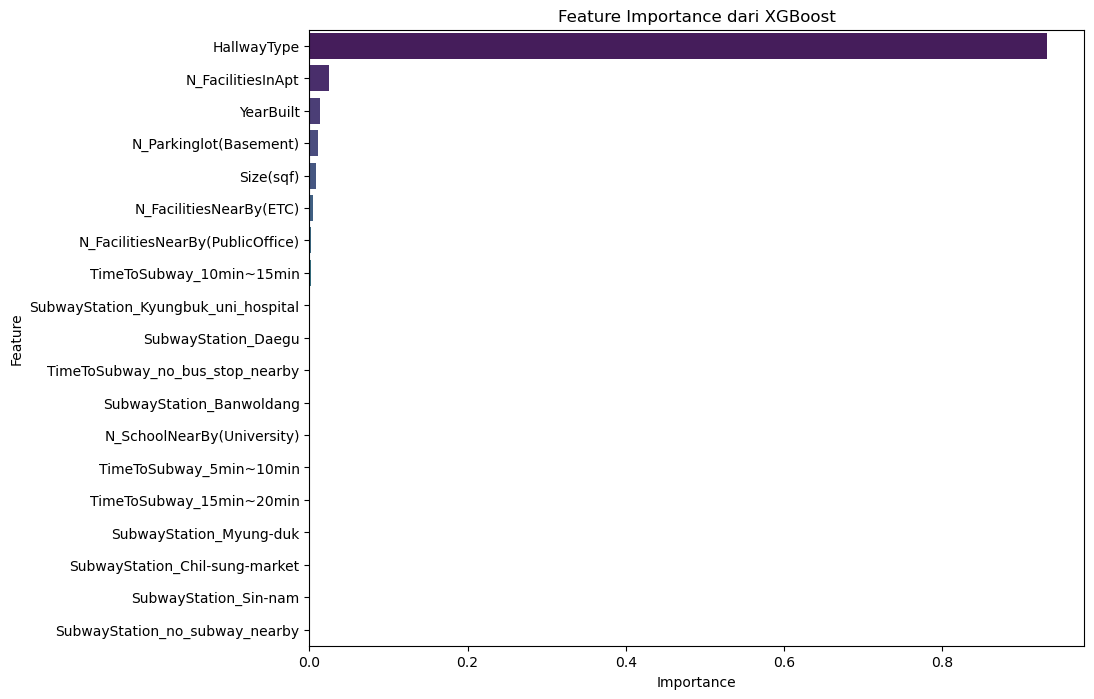

In [11]:
# Menampilkan fitur penting
importances = xgb_model.feature_importances_

# Buat DataFrame untuk feature importance
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan feature importance dalam bentuk grafik
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance dari XGBoost')
plt.show()


In [12]:
# Fungsi untuk mengubah format angka dari notasi ilmiah menjadi desimal biasa
def format_angka(angka):
    return '{:.5f}'.format(angka)

# Terapkan fungsi ke seluruh kolom 'Angka' dalam DataFrame
importance_df['Importance'] = importance_df['Importance'].apply(format_angka)

importance_df

Feature Importance
7                           HallwayType    0.93344
5                     N_FacilitiesInApt    0.02520
4                             YearBuilt    0.01285
3                N_Parkinglot(Basement)    0.01040
6                             Size(sqf)    0.00861
0               N_FacilitiesNearBy(ETC)    0.00492
1      N_FacilitiesNearBy(PublicOffice)    0.00198
8              TimeToSubway_10min~15min    0.00142
15  SubwayStation_Kyungbuk_uni_hospital    0.00025
14                  SubwayStation_Daegu    0.00022
11      TimeToSubway_no_bus_stop_nearby    0.00021
12             SubwayStation_Banwoldang    0.00020
2            N_SchoolNearBy(University)    0.00017
10              TimeToSubway_5min~10min    0.00007
9              TimeToSubway_15min~20min    0.00005
16              SubwayStation_Myung-duk    0.00001
13       SubwayStation_Chil-sung-market    0.00000
17                SubwayStation_Sin-nam    0.00000
18       SubwayStation_no_subway_nearby    0.00000

In [13]:
#Fitur yang akan digunakan
fitur_select=importance_df.iloc[:6]
fitur_select

Feature Importance
7              HallwayType    0.93344
5        N_FacilitiesInApt    0.02520
4                YearBuilt    0.01285
3   N_Parkinglot(Basement)    0.01040
6                Size(sqf)    0.00861
0  N_FacilitiesNearBy(ETC)    0.00492

In [14]:
fitur_select['Feature'].unique()

array(['HallwayType', 'N_FacilitiesInApt', 'YearBuilt',
       'N_Parkinglot(Basement)', 'Size(sqf)', 'N_FacilitiesNearBy(ETC)'],
      dtype=object)

# Modelling

## Modeling dengan Fitur yang sudah dipilih

In [68]:
X=df[['HallwayType', 'N_FacilitiesInApt', 'YearBuilt',
       'N_Parkinglot(Basement)',
      'Size(sqf)', 'N_FacilitiesNearBy(ETC)']]
y=df[['SalePrice']]

In [69]:
# Memisahkan kolom numerikal dan kategorikal
numerical_cols = ['Size(sqf)', 'YearBuilt',
                  'N_FacilitiesInApt','N_FacilitiesNearBy(ETC)',
                  'N_Parkinglot(Basement)', 
                  ]
ordinal_cols = ['HallwayType']


# Preprocessing untuk data numerikal, ordinal, dan binary
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])


ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ], remainder='passthrough')

In [70]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import make_scorer, root_mean_squared_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Memilih Benchmark Model

Pemilihan berbagai model untuk benchmark adalah strategi yang baik untuk mengidentifikasi model terbaik yang dapat memprediksi harga apartemen dengan akurasi tinggi. Setiap model memiliki kelebihan dan kekurangan masing-masing yang bisa memberikan perspektif berbeda dalam analisis data. Berikut penjelasan mengapa setiap model berikut dipilih:

1. ` Regression (Ridge):`

    - Regularisasi L2: Ridge Regression menambahkan penalti L2 ke fungsi loss yang membantu mengurangi multikolinearitas dan mencegah overfitting.
    - Kinerja pada Data Skala Besar: Ridge cocok untuk dataset dengan banyak fitur dan dapat menangani multikolinearitas dengan baik.
    - Pengendalian Koefisien: Membatasi besaran koefisien regresi, menjaga mereka tetap kecil dan stabil.
    
    
2. `Lasso Regression (Lasso):`

    - Regularisasi L1: Lasso Regression menambahkan penalti L1 yang dapat mendorong beberapa koefisien menjadi nol, sehingga dapat melakukan seleksi fitur secara otomatis.
    - Simplicity and Interpretability: Dengan melakukan seleksi fitur, Lasso menghasilkan model yang lebih sederhana dan lebih mudah diinterpretasi.

3. `Random Forest Regressor (RF):`

    - Ensemble Learning: Menggunakan banyak pohon keputusan untuk menghasilkan prediksi yang lebih stabil dan akurat.
    - Handling Non-linearity: Random Forest dapat menangani hubungan non-linear antara fitur dan target.
    - Feature Importance: Mampu memberikan wawasan tentang pentingnya setiap fitur dalam prediksi.

4. `Gradient Boosting Regressor (GB):`

    - Boosting Technique: Membangun model secara berurutan, di mana setiap model baru memperbaiki kesalahan dari model sebelumnya.
    - High Predictive Power: Dikenal karena kinerja yang sangat baik dalam berbagai kompetisi dan aplikasi dunia nyata.
    - Handling Non-linearity: Efektif untuk menangani hubungan non-linear yang kompleks dalam data.

5. `XGBoost Regressor (XGB):`

    - Extreme Gradient Boosting: Versi yang dioptimalkan dari Gradient Boosting yang lebih cepat dan efisien dalam hal komputasi.
    - - Regularization: Menyediakan regulasi L1 dan L2 untuk mencegah overfitting.
    - Scalability and Speed: Mampu menangani dataset besar dengan lebih cepat dan efisien.

6. `AdaBoost Regressor (Ada):`

    - Boosting Technique: Menggabungkan banyak estimator sederhana (biasanya pohon keputusan) untuk meningkatkan akurasi prediksi.
    - Handling Outliers: Dapat memberikan bobot lebih pada observasi yang sulit diprediksi.
    - Versatility: Dapat digunakan dengan berbagai tipe base learners untuk meningkatkan kinerja.

7. `KNeighbors Regressor (KNN):`

    - Instance-Based Learning: Membuat prediksi berdasarkan pada tetangga terdekat dalam data pelatihan.
    - Non-parametric: Tidak membuat asumsi khusus tentang distribusi data yang mendasarinya.
    - Simplicity and Interpretability: Sangat sederhana dan mudah diinterpretasi, tetapi dapat bekerja dengan baik untuk dataset dengan struktur yang jelas.


In [72]:
# Definisikan algoritma yang digunakan
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)
knn = KNeighborsRegressor()

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_ridge = TransformedTargetRegressor(ridge, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(lasso, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_ridge, log_lasso, log_rf, log_gb, log_xgb, log_ada, log_knn]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for model in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(-model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(-model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(-model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

# Tampilkan hasil evaluasi
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'AdaBoost', 'KNN'],
    'Mean RMSE': nilai_mean_rmse,
    'Std RMSE': nilai_std_rmse,
    'Mean MAE': nilai_mean_mae,
    'Std MAE': nilai_std_mae,
    'Mean MAPE': nilai_mean_mape,
    'Std MAPE': nilai_std_mape
})

results


Model      Mean RMSE     Std RMSE      Mean MAE      Std MAE  \
0              Ridge   55362.638306   551.484137  44253.257862   444.781037   
1              Lasso  109140.447661   966.931276  86830.021396   706.199298   
2      Random Forest   46332.316256  1241.275253  36944.590190  1043.385449   
3  Gradient Boosting   45904.664817  1062.471981  36642.351839   955.529434   
4            XGBoost   46394.079730  1280.016612  36966.326053  1010.981080   
5           AdaBoost   55285.940224  1766.677159  44015.059719  1485.424479   
6                KNN   49672.973101   996.902976  38973.404883  1331.001342   

   Mean MAPE  Std MAPE  
0   0.221747  0.008627  
1   0.517847  0.045798  
2   0.185368  0.007702  
3   0.183629  0.006809  
4   0.185725  0.008134  
5   0.210950  0.007637  
6   0.194815  0.008321

Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai `RMSE`, `MAE`, dan `MAPE`, `Gradient Boosting` adalah model terbaik.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 3 benchmark model terbaik, yaitu Gradient Boosting, XGBoost dan RandomForest. 

## Prediksi Pada Data Test Menggunakan `3 Model` Terbaik

Prediksi pada test set dengan menggunakan model `Gradient Boosting Regressor`, `XGBoost`, dan `Random Forest Regressor`

In [73]:
# Inisialisasi model
models = {
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42)
}

# Inisialisasi hasil evaluasi
evaluation_results = {'Model': [], 'RMSE': [], 'MAE': [], 'MAPE': []}

# Loop melalui setiap model
for name, model in models.items():
    # Buat pipeline untuk model
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    # Fit model ke data latih
    pipeline.fit(X_train, y_train)
    
    # Prediksi pada data tes
    y_pred = pipeline.predict(X_test)
    
    # Hitung metrik evaluasi
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Simpan hasil evaluasi
    evaluation_results['Model'].append(name)
    evaluation_results['RMSE'].append(rmse)
    evaluation_results['MAE'].append(mae)
    evaluation_results['MAPE'].append(mape)

# Buat dataframe dari hasil evaluasi
score_test_before_tuning = pd.DataFrame(evaluation_results)

# Tampilkan dataframe
score_test_before_tuning

Model          RMSE           MAE      MAPE
0        Gradient Boosting  47687.868578  38779.490475  0.197846
1  Random Forest Regressor  48188.610132  39005.043987  0.200338
2            XGB Regressor  47934.553165  38918.180200  0.198056

# Hyperparameter Tuning

In [25]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline

# Modeling dengan hyperparameter tuning
gb = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Membuat algorithm chains
gb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', gb)
])

rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', rf)
])

xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', xgb)
])

# Parameter distributions
param_dist_gb = {
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.1),
    'model__n_estimators': randint(100, 501),
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 5),
    'model__max_features': ['auto', 'sqrt', 'log2']
}

param_dist_rf = {
    'model__n_estimators': randint(100, 501),
    'model__max_depth': randint(10, 30),
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 5),
    'model__max_features': ['auto', 'sqrt', 'log2']
}

param_dist_xgb = {
    'model__n_estimators': randint(100, 501),
    'model__learning_rate': uniform(0.01, 0.1),
    'model__max_depth': randint(3, 30),
    'model__subsample': uniform(0.7, 0.3),
    'model__colsample_bytree': uniform(0.7, 0.3)
}

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_gb = RandomizedSearchCV(
    gb_pipeline, 
    param_distributions=param_dist_gb,
    n_iter=50,
    cv=crossval, 
    scoring='neg_mean_absolute_error', 
    n_jobs=-1,
    random_state=42 
)

random_rf = RandomizedSearchCV(
    rf_pipeline, 
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=crossval, 
    scoring='neg_mean_absolute_error', 
    n_jobs=-1,
    random_state=42 
)

random_xgb = RandomizedSearchCV(
    xgb_pipeline, 
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=crossval, 
    scoring='neg_mean_absolute_error', 
    n_jobs=-1,
    random_state=42 
)

# Lakukan fitting untuk setiap RandomizedSearchCV dengan data training
random_gb.fit(X_train, y_train)
random_rf.fit(X_train, y_train)
random_xgb.fit(X_train, y_train)

# Define model terhadap estimator terbaik untuk ketiga model
gb_tuning = random_gb.best_estimator_
rf_tuning = random_rf.best_estimator_
xgb_tuning = random_xgb.best_estimator_

# Fitting model untuk ketiga model
gb_tuning.fit(X_train, y_train)
rf_tuning.fit(X_train, y_train)
xgb_tuning.fit(X_train, y_train)

# Predict test set untuk ketiga model
y_pred_gb_tuning = gb_tuning.predict(X_test)
y_pred_rf_tuning = rf_tuning.predict(X_test)
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning untuk ketiga model
rmse_gb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gb_tuning))
mae_gb_tuning = mean_absolute_error(y_test, y_pred_gb_tuning)
mape_gb_tuning = mean_absolute_percentage_error(y_test, y_pred_gb_tuning)

rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

# Simpan nilai metrics dalam DataFrame
score_after_tuning = pd.DataFrame({
    'Gradient Boosting': {'RMSE': rmse_gb_tuning, 'MAE': mae_gb_tuning, 'MAPE': mape_gb_tuning},
    'Random Forest Regressor': {'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning},
    'XGB Regressor': {'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}
})

score_after_tuning.T

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/s

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/s

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/s

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/s

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/s

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/s

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y wa

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y wa

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y wa

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y wa

/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/fatikarahmasanjaya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y wa

RMSE           MAE      MAPE
Gradient Boosting        47659.074800  38726.045432  0.197445
Random Forest Regressor  47959.466153  38923.921929  0.198338
XGB Regressor            47564.971697  38716.262332  0.197142

In [27]:
# Cek skor dan params terbaik
print('Gradient Boosting Regressor')
print('Best_score:', random_gb.best_score_)
print('Best_params:', random_gb.best_params_)

Gradient Boosting Regressor
Best_score: -37008.699034759156
Best_params: {'model__learning_rate': 0.08290071680409873, 'model__max_depth': 3, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 3, 'model__n_estimators': 330}


In [28]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -37103.47477936921
Best_params: {'model__colsample_bytree': 0.8549907673813042, 'model__learning_rate': 0.036082917483040905, 'model__max_depth': 3, 'model__n_estimators': 403, 'model__subsample': 0.989625805386638}


In [29]:
# Cek skor dan params terbaik
print('Random Forest Regressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest Regressor
Best_score: -37297.75942093319
Best_params: {'model__max_depth': 12, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 3, 'model__n_estimators': 443}


In [30]:
#Scoring Metrics Setelah Tuning Parameters
score_after_tuning.T

RMSE           MAE      MAPE
Gradient Boosting        47659.074800  38726.045432  0.197445
Random Forest Regressor  47959.466153  38923.921929  0.198338
XGB Regressor            47564.971697  38716.262332  0.197142

### Evaluasi dan Pemilihan Model Terbaik:
- RMSE:

`XGBoost` memiliki nilai `RMSE terendah` (47564.97), diikuti oleh Gradient Boosting (47659.07), dan Random Forest memiliki RMSE tertinggi (46229.79).

- MAE:

`XGBoost` memiliki nilai `MAE terendah` (38716.26), diikuti oleh Gradient Boosting (38726.04), dan Random Forest memiliki MAE tertinggi (38923.92).

- MAPE:

`XGBoost` memiliki nilai `MAPE terendah` (0.197142), diikuti oleh Gradient Boosting (0.197445), dan Random Forest memiliki MAPE tertinggi (0.198338).

> Berdasarkan hasil evaluasi di atas, `XGBoost` adalah model terbaik karena memiliki nilai RMSE, MAE, dan MAPE terendah dibandingkan dengan model Gradient Boosting dan Random Forest. Hal ini menunjukkan bahwa XGBoost lebih akurat dalam memprediksi data dibandingkan dengan dua model lainnya.

> Pemilihan `XGBoost` sebagai model terbaik berarti model ini paling efektif dalam menangani variabilitas data dan memberikan prediksi yang lebih dekat dengan nilai sebenarnya, sehingga dapat digunakan untuk aplikasi yang membutuhkan tingkat akurasi tinggi.

In [32]:
# Perbandingan Metrics sebelum dan setelah dilakukan hyperparameter tuning
display(score_test_before_tuning,score_after_tuning.T)

Model          RMSE           MAE      MAPE
0        Gradient Boosting  47687.868578  38779.490475  0.197846
1  Random Forest Regressor  48188.610132  39005.043987  0.200338
2            XGB Regressor  47934.553165  38918.180200  0.198056

RMSE           MAE      MAPE
Gradient Boosting        47659.074800  38726.045432  0.197445
Random Forest Regressor  47959.466153  38923.921929  0.198338
XGB Regressor            47564.971697  38716.262332  0.197142

In [34]:
import plotly.express as px

# Ambil kolom target dari DataFrame y_test dan konversi menjadi larik
y_test_values = y_test['SalePrice'].values

# Membuat grafik scatter plot
fig = px.scatter(x=y_test_values, y=y_pred_xgb_tuning, trendline='ols',trendline_color_override='red')

# Update layout untuk membuat bingkai
fig.update_layout(
    title_text="Actual VS Prediction",
    xaxis_title="Actual",
    yaxis_title="Prediction",
    showlegend=False,
    width=800,
    height=400,
    template="simple_white"
)

# Menampilkan grafik
fig.show()


In [35]:
# buat dataframe berisi data setelah predict
final = pd.DataFrame({
    "test" : y_test['SalePrice'],
    "predict" : y_pred_xgb_tuning
})
final['residu'] = final['predict'] - final['test']
final.reset_index(drop=True, inplace=True)

# buat looping label keterangan
ket = []
for i in final['residu']:
    if i >= 47565 :
        ket.append('overestimated')
    elif i <= -47565 :
        ket.append('underestimated')
    else:
        ket.append('reasonable')

final['keterangan'] = pd.DataFrame(ket)
final.head()

test        predict        residu      keterangan
0  433778  409068.000000 -24710.000000      reasonable
1  356637  284689.250000 -71947.750000  underestimated
2  201769  209731.750000   7962.750000      reasonable
3  371681  282439.562500 -89241.437500  underestimated
4  119469  144236.828125  24767.828125      reasonable

In [36]:
# Hitung total persentase dari kolom 'keterangan' untuk masing-masing nilai unik
keterangan_percentage = final['keterangan'].value_counts(normalize=True) * 100

# Tampilkan hasilnya
keterangan_percentage


keterangan
reasonable        64.879852
overestimated     17.744917
underestimated    17.375231
Name: proportion, dtype: float64

Berdasarkan hasil final pemodelan dengan `XGBoost` diperoleh nilai `RMSE` sebesar `47565` yang diartikan data prediksi `SalePrice` terdapat error yang wajar sebesar `47565`. Selanjutnya diperoleh rasio hasil prediksi yang termasuk `overestimated` (hasil prediksi jauh lebih tinggi dari aktual) sebesar 17.74% dan rasio `underestimated` (hasil prediksi jauh lebih rendah dari aktual) sebesar 17.37%

Adanya nilai-nilai error yang tinggi menyebabkan perbedaan yang signifikan antara nilai RMSE dan MAE. Hal ini terlihat pada plot di atas, di mana terdapat harga aktual yang rendah namun diprediksi dengan nilai yang jauh lebih tinggi (overestimation), dan sebaliknya, terdapat juga harga aktual yang tinggi namun diprediksi dengan nilai yang lebih rendah (underestimation).

Meskipun demikian, nilai `MAPE` yang diperoleh sekitar `19.7%` menjadikan model ini termasuk dalam kategori reasonable forecasting (Lewis, 1982). Dalam kategori ini, meskipun terdapat perbedaan antara nilai prediksi dan nilai aktual, namun kesalahan tersebut masih dapat diterima dan dipertimbangkan sebagai hasil yang wajar dari proses peramalan.

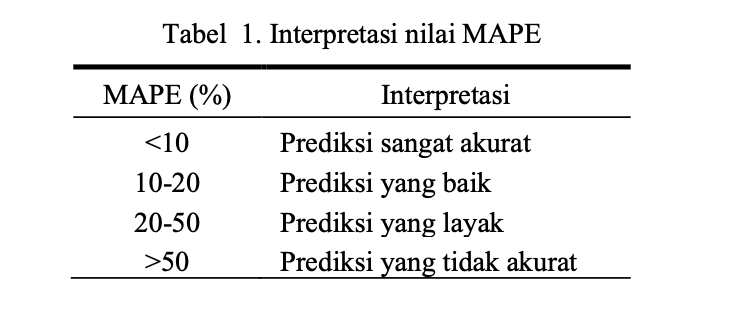

`Referensi`: C. D. Lewis, 1982. Industrial and business forecasting methods:
A practical guide to exponential smoothing and curve fitting.
Butterworth-Heinemann

In [133]:
# Normality Residu

In [134]:
final

test        predict        residu      keterangan
0    433778  409068.000000 -24710.000000      reasonable
1    356637  284689.250000 -71947.750000  underestimated
2    201769  209731.750000   7962.750000      reasonable
3    371681  282439.562500 -89241.437500  underestimated
4    119469  144236.828125  24767.828125      reasonable
..      ...            ...           ...             ...
536   41061   57183.589844  16122.589844      reasonable
537  163716  212053.156250  48337.156250   overestimated
538  307964  348578.625000  40614.625000      reasonable
539  170353  205568.765625  35215.765625      reasonable
540  203539  241817.375000  38278.375000      reasonable

[541 rows x 4 columns]

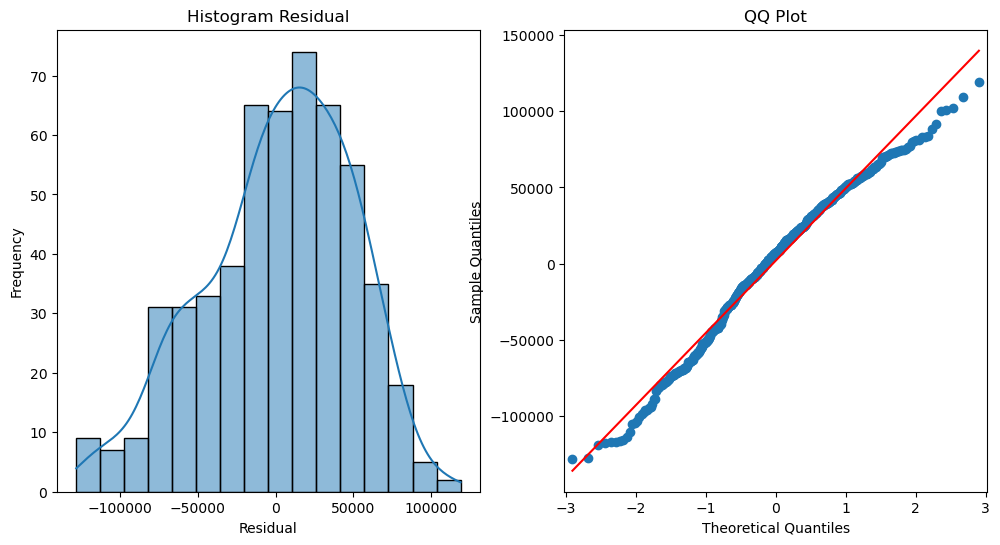

In [135]:
# Plot histogram residual dan QQ Plot Residu
import statsmodels.api as sm

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(final['residu'], kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram Residual')

# Plot QQ plot
plt.subplot(1, 2, 2)
sm.qqplot(final['residu'], line='s', ax=plt.gca())
plt.title('QQ Plot')

plt.show()

In [137]:
from scipy.stats import normaltest

# Uji normalitas dengan uji D'Agostino and Pearson's Test
statistic, p_value = normaltest(final['residu'])
print("D'Agostino and Pearson's Test")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < 0.05:
    print("Residual tidak berdistribusi normal (tolak H0).")
else:
    print("Residual berdistribusi normal (tidak ada bukti untuk menolak H0).")

D'Agostino and Pearson's Test
Statistic: 17.05784962934996
P-value: 0.0001976673847830008
Residual tidak berdistribusi normal (tolak H0).


Pengecekan distribusi dari residu dilakukan dengan membuat histogram, QQ-Plot serta pengujian statistik dan menghasilkan bahwa **distribusi dari residu tidak normal**

# Interpretasi Model

`Interpretasi model` adalah proses pemahaman dan penjelasan tentang bagaimana model machine learning membuat prediksi berdasarkan variabel input yang diberikan. Ini melibatkan identifikasi pengaruh variabel input terhadap prediksi yang dihasilkan oleh model. Dalam interpretasi model, kita mencari jawaban atas pertanyaan seperti: "Variabel mana yang paling mempengaruhi prediksi?", "Bagaimana hubungan antara variabel input dan output?", dan "Bagaimana variabel input berkontribusi terhadap hasil prediksi?". Untuk interpretasi model yang digunakan adalah:


## Feature Importance:
`Feature Importance` adalah ukuran yang digunakan untuk menilai seberapa penting setiap fitur (variabel input) dalam membuat prediksi oleh model. Metode ini membantu kita memahami kontribusi relatif dari masing-masing fitur terhadap hasil prediksi. Feature Importance dapat diekstraksi dari beberapa jenis model machine learning, seperti decision trees, random forests, dan ensemble models.

## SHAP (SHapley Additive exPlanations):
`SHAP` adalah teknik yang digunakan untuk menjelaskan prediksi model dengan cara yang dapat diinterpretasikan manusia. Ini memungkinkan kita untuk mengidentifikasi kontribusi masing-masing fitur terhadap prediksi secara individual, sehingga memberikan pemahaman yang lebih mendalam tentang bagaimana model membuat keputusan. SHAP berguna dalam mendapatkan wawasan tentang pentingnya setiap fitur dan hubungannya dengan prediksi model, serta dalam memecahkan "black box" dari model machine learning.

## Feature Importance terhadap Model Final

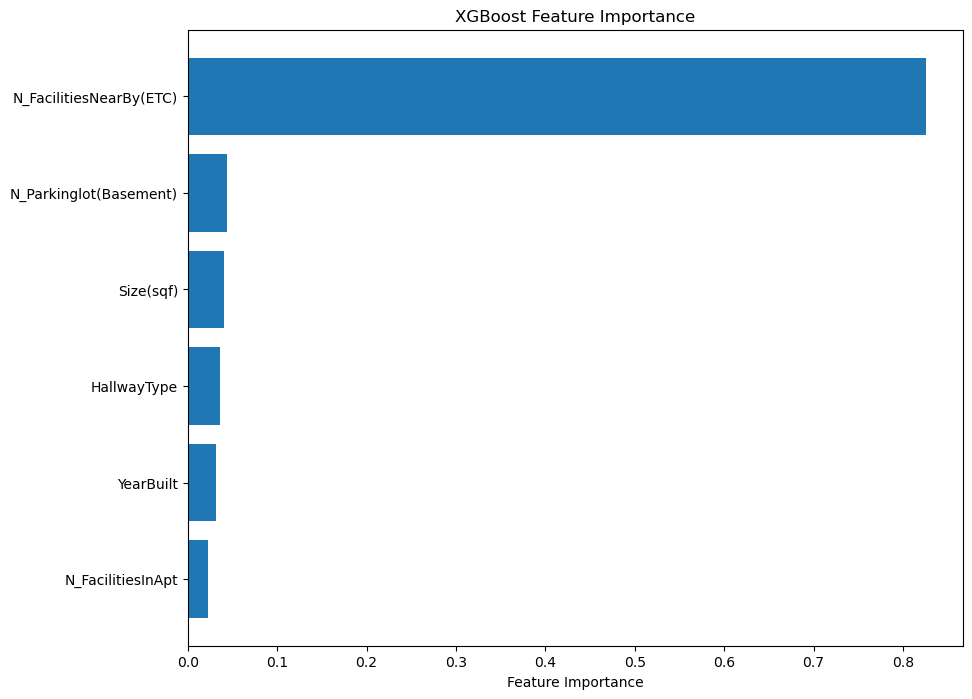

In [41]:
# Akses fitur penting dari model Gradient Boosting yang telah dituning
feature_importance = xgb_tuning.named_steps['model'].feature_importances_

# Urutkan fitur penting
sorted_idx = feature_importance.argsort()

# Plot bar untuk menampilkan fitur penting
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

In [40]:
# Buat DataFrame untuk menampung nama fitur dan nilai fitur penting
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Urutkan DataFrame berdasarkan nilai fitur penting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

Feature  Importance
5  N_FacilitiesNearBy(ETC)    0.825611
3   N_Parkinglot(Basement)    0.044019
4                Size(sqf)    0.039968
0              HallwayType    0.036374
2                YearBuilt    0.030946
1        N_FacilitiesInApt    0.023082

In [129]:
# Shap

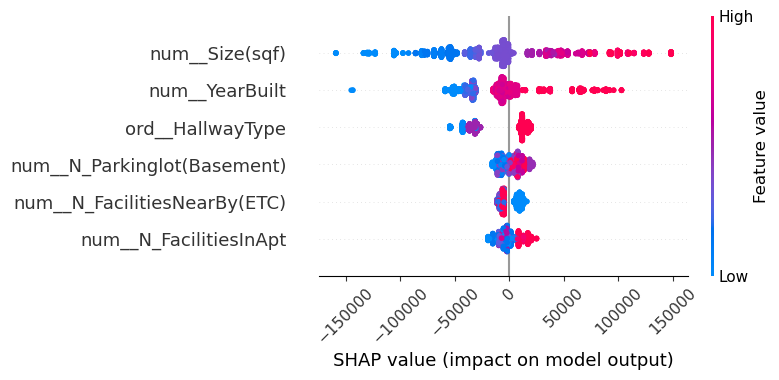

In [150]:
import shap

final_model = xgb_tuning

# Membuat algorithm chains
final_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ])

X_train_encod = pd.DataFrame(final_pipeline.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test_encod = pd.DataFrame(final_pipeline.fit_transform(X_train), columns=preprocessor.get_feature_names_out())



shap_values = shap.TreeExplainer(final_model['model'],
                                 data = X_train_encod,
                                 feature_perturbation = "interventional",
                                 model_output="raw").shap_values(X_train_encod)

plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
shap.summary_plot(shap_values, X_train_encod, feature_names = preprocessor.get_feature_names_out())


***Analisis Diagram SHAP***

1. `num__Size(sqf) (Ukuran Apartemen):`

Fitur ini memiliki pengaruh paling signifikan terhadap prediksi harga jual.
Ukuran apartemen yang lebih besar (merah) cenderung meningkatkan harga jual secara signifikan, sedangkan ukuran yang lebih kecil (biru) mengurangi harga.

2. `num__YearBuilt (Tahun Dibangun):`

Apartemen yang lebih baru (merah) cenderung memiliki nilai SHAP positif, yang berarti mereka meningkatkan harga jual.
Apartemen yang lebih tua (biru) cenderung menurunkan harga jual.

3. `ord__HallwayType (Jenis Lorong):`

Jenis lorong apartemen memiliki dampak bervariasi, dengan beberapa jenis lorong meningkatkan harga dan beberapa lainnya menurunkan harga.

4. `num__N_Parkinglot(Basement) (Jumlah Tempat Parkir di Basement):`

Jumlah tempat parkir memiliki pengaruh kecil tetapi tetap signifikan.
Lebih banyak tempat parkir (merah) cenderung meningkatkan harga jual.

5. `num__N_FacilitiesNearBy(ETC) (Jumlah Fasilitas di Sekitar):`

Fasilitas di sekitar apartemen memiliki dampak positif yang jelas, di mana lebih banyak fasilitas (merah) meningkatkan harga jual.

6. `num__N_FacilitiesInApt (Jumlah Fasilitas di Dalam Apartemen):`

Fasilitas di dalam apartemen juga mempengaruhi harga, dengan lebih banyak fasilitas (merah) meningkatkan harga jual.

# Membuat Model Rule-Based

In [ ]:
untuk membandingkan hasil model terbaik dengan model tradisional

In [84]:
# Tentukan batas bin untuk kategori kecil, sedang, dan besar
bins = [0, 500, 1000, float('inf')]  # kategori kecil (<500), sedang (500-1000), besar (>1000)

# Label untuk setiap kategori
labels = ['Kecil', 'Sedang', 'Besar']

# Lakukan binning pada kolom Size(sqf)
df['Size_Category'] = pd.cut(df['Size(sqf)'], bins=bins, labels=labels, right=False)

df.head()

HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
0    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1    terraced  10min~15min  Kyungbuk_uni_hospital                      1.0   
2       mixed  15min~20min       Chil-sung-market                      1.0   
3       mixed   5min~10min                Bangoge                      5.0   
4    terraced       0-5min                Sin-nam                      0.0   

   N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
0                               3.0                         2.0   
1                               5.0                         1.0   
2                               7.0                         3.0   
3                               5.0                         4.0   
4                               1.0                         2.0   

   N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  SalePrice  \
0                  1270.0       2007                 10       1387     346017   
1                     0.0       1986                  4        914     150442   
2                    56.0       1997                  5        558      61946   
3                   798.0       2005                  7        914     165486   
4                   536.0       2006                  5       1743     311504   

  Size_Category  
0         Besar  
1        Sedang  
2        Sedang  
3        Sedang  
4         Besar

In [105]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [106]:
# Step 1: Buat model rule-based
# Hitung rata-rata SalePrice untuk setiap kombinasi Hallway Type dan Category Size
grouped_means = df_train.groupby(['HallwayType', 'Size_Category'])['SalePrice'].mean().reset_index()
grouped_means.rename(columns={'SalePrice': 'MeanSalePrice'}, inplace=True)
grouped_means['MeanSalePrice'] = grouped_means['MeanSalePrice'].round().astype(int)
grouped_means

HallwayType Size_Category  MeanSalePrice
0    corridor         Kecil          66342
1    corridor        Sedang         105313
2    corridor         Besar         241150
3       mixed         Kecil          66592
4       mixed        Sedang         156472
5       mixed         Besar         229839
6    terraced         Kecil         102753
7    terraced        Sedang         254550
8    terraced         Besar         322445

In [109]:
# Aturan harga berdasarkan HallwayType dan Size Category
price_rules = {
    ('corridor', 'Kecil'): 66342,
    ('corridor', 'Sedang'): 105313,
    ('corridor', 'Besar'): 241150,
    ('mixed', 'Kecil'): 66592,
    ('mixed', 'Sedang'): 156472,
    ('mixed', 'Besar'): 229839,
    ('terraced', 'Kecil'): 102753,
    ('terraced', 'Sedang'): 254550,
    ('terraced', 'Besar'): 322445
}

# Membuat prediksi berdasarkan aturan harga
def predict_rule_based(row):
    hallway_type = row['HallwayType']
    size_category = row['Size_Category']
    
    if (hallway_type, size_category) in price_rules:
        return price_rules[(hallway_type, size_category)]
    else:
        return None

# Menambahkan kolom prediksi harga berdasarkan aturan
df_test['Price_Rule_Based'] = df_test.apply(predict_rule_based, axis=1)

# Prediksi harga menggunakan model Gradient Boosting ke semua data
# y_pred_gb_all = best_gb.predict(X_test)

# Menambahkan kolom prediksi harga dari model Gradient Boosting ke DataFrame
# df['Price_GB'] = y_pred_gb_all.round().astype(int)

df_test

HallwayType        TimeToSubway          SubwayStation  \
2927    terraced              0-5min  Kyungbuk_uni_hospital   
1427    terraced              0-5min                Sin-nam   
2081       mixed          5min~10min                Bangoge   
352     terraced              0-5min             Banwoldang   
1861       mixed         15min~20min       Chil-sung-market   
...          ...                 ...                    ...   
3063    corridor         10min~15min              Myung-duk   
874        mixed         15min~20min              Myung-duk   
1076    terraced              0-5min                Sin-nam   
2696    terraced         10min~15min  Kyungbuk_uni_hospital   
1625    terraced  no_bus_stop_nearby       no_subway_nearby   

      N_FacilitiesNearBy(ETC)  N_FacilitiesNearBy(PublicOffice)  \
2927                      0.0                               3.0   
1427                      0.0                               1.0   
2081                      5.0                               5.0   
352                       0.0                               2.0   
1861                      1.0                               7.0   
...                       ...                               ...   
3063                      5.0                               7.0   
874                       5.0                               6.0   
1076                      0.0                               1.0   
2696                      1.0                               2.0   
1625                      2.0                               2.0   

      N_SchoolNearBy(University)  N_Parkinglot(Basement)  YearBuilt  \
2927                         2.0                  1270.0       2007   
1427                         2.0                   536.0       2006   
2081                         4.0                   798.0       2005   
352                          2.0                   524.0       2007   
1861                         3.0                    56.0       1997   
...                          ...                     ...        ...   
3063                         5.0                     0.0       1992   
874                          5.0                   536.0       1993   
1076                         2.0                   536.0       2006   
2696                         2.0                   184.0       2006   
1625                         1.0                   203.0       2009   

      N_FacilitiesInApt  Size(sqf)  SalePrice Size_Category  Price_Rule_Based  
2927                 10       1643     433778         Besar            322445  
1427                  5       1149     356637         Besar            322445  
2081                  7        914     201769        Sedang            156472  
352                   4       1419     371681         Besar            322445  
1861                  5        914     119469        Sedang            156472  
...                 ...        ...        ...           ...               ...  
3063                  3        355      41061         Kecil             66342  
874                   4       1451     163716         Besar            229839  
1076                  5       1743     307964         Besar            322445  
2696                  5        814     170353        Sedang            254550  
1625                  5       1160     203539         Besar            322445  

[541 rows x 13 columns]

In [117]:
df_test

HallwayType        TimeToSubway          SubwayStation  \
2927    terraced              0-5min  Kyungbuk_uni_hospital   
1427    terraced              0-5min                Sin-nam   
2081       mixed          5min~10min                Bangoge   
352     terraced              0-5min             Banwoldang   
1861       mixed         15min~20min       Chil-sung-market   
...          ...                 ...                    ...   
3063    corridor         10min~15min              Myung-duk   
874        mixed         15min~20min              Myung-duk   
1076    terraced              0-5min                Sin-nam   
2696    terraced         10min~15min  Kyungbuk_uni_hospital   
1625    terraced  no_bus_stop_nearby       no_subway_nearby   

      N_FacilitiesNearBy(ETC)  N_FacilitiesNearBy(PublicOffice)  \
2927                      0.0                               3.0   
1427                      0.0                               1.0   
2081                      5.0                               5.0   
352                       0.0                               2.0   
1861                      1.0                               7.0   
...                       ...                               ...   
3063                      5.0                               7.0   
874                       5.0                               6.0   
1076                      0.0                               1.0   
2696                      1.0                               2.0   
1625                      2.0                               2.0   

      N_SchoolNearBy(University)  N_Parkinglot(Basement)  YearBuilt  \
2927                         2.0                  1270.0       2007   
1427                         2.0                   536.0       2006   
2081                         4.0                   798.0       2005   
352                          2.0                   524.0       2007   
1861                         3.0                    56.0       1997   
...                          ...                     ...        ...   
3063                         5.0                     0.0       1992   
874                          5.0                   536.0       1993   
1076                         2.0                   536.0       2006   
2696                         2.0                   184.0       2006   
1625                         1.0                   203.0       2009   

      N_FacilitiesInApt  Size(sqf)  SalePrice Size_Category  Price_Rule_Based  \
2927                 10       1643     433778         Besar            322445   
1427                  5       1149     356637         Besar            322445   
2081                  7        914     201769        Sedang            156472   
352                   4       1419     371681         Besar            322445   
1861                  5        914     119469        Sedang            156472   
...                 ...        ...        ...           ...               ...   
3063                  3        355      41061         Kecil             66342   
874                   4       1451     163716         Besar            229839   
1076                  5       1743     307964         Besar            322445   
2696                  5        814     170353        Sedang            254550   
1625                  5       1160     203539         Besar            322445   

          Price_xgb  
2927  409068.000000  
1427  284689.250000  
2081  209731.750000  
352   282439.562500  
1861  144236.828125  
...             ...  
3063   57183.589844  
874   212053.156250  
1076  348578.625000  
2696  205568.765625  
1625  241817.375000  

[541 rows x 14 columns]

In [119]:
# Siapkan fitur dan target
X_train2 = df_train.drop(columns=['SalePrice'])
y_train2 = df_train['SalePrice']
X_test2 = df_test.drop(columns=['SalePrice', 'Price_Rule_Based'])

In [122]:
df_test['Price_xgb']=xgb_tuning.predict(X_test2).round().astype(int)

In [123]:
df_test

HallwayType        TimeToSubway          SubwayStation  \
2927    terraced              0-5min  Kyungbuk_uni_hospital   
1427    terraced              0-5min                Sin-nam   
2081       mixed          5min~10min                Bangoge   
352     terraced              0-5min             Banwoldang   
1861       mixed         15min~20min       Chil-sung-market   
...          ...                 ...                    ...   
3063    corridor         10min~15min              Myung-duk   
874        mixed         15min~20min              Myung-duk   
1076    terraced              0-5min                Sin-nam   
2696    terraced         10min~15min  Kyungbuk_uni_hospital   
1625    terraced  no_bus_stop_nearby       no_subway_nearby   

      N_FacilitiesNearBy(ETC)  N_FacilitiesNearBy(PublicOffice)  \
2927                      0.0                               3.0   
1427                      0.0                               1.0   
2081                      5.0                               5.0   
352                       0.0                               2.0   
1861                      1.0                               7.0   
...                       ...                               ...   
3063                      5.0                               7.0   
874                       5.0                               6.0   
1076                      0.0                               1.0   
2696                      1.0                               2.0   
1625                      2.0                               2.0   

      N_SchoolNearBy(University)  N_Parkinglot(Basement)  YearBuilt  \
2927                         2.0                  1270.0       2007   
1427                         2.0                   536.0       2006   
2081                         4.0                   798.0       2005   
352                          2.0                   524.0       2007   
1861                         3.0                    56.0       1997   
...                          ...                     ...        ...   
3063                         5.0                     0.0       1992   
874                          5.0                   536.0       1993   
1076                         2.0                   536.0       2006   
2696                         2.0                   184.0       2006   
1625                         1.0                   203.0       2009   

      N_FacilitiesInApt  Size(sqf)  SalePrice Size_Category  Price_Rule_Based  \
2927                 10       1643     433778         Besar            322445   
1427                  5       1149     356637         Besar            322445   
2081                  7        914     201769        Sedang            156472   
352                   4       1419     371681         Besar            322445   
1861                  5        914     119469        Sedang            156472   
...                 ...        ...        ...           ...               ...   
3063                  3        355      41061         Kecil             66342   
874                   4       1451     163716         Besar            229839   
1076                  5       1743     307964         Besar            322445   
2696                  5        814     170353        Sedang            254550   
1625                  5       1160     203539         Besar            322445   

      Price_xgb  
2927     409068  
1427     284689  
2081     209732  
352      282440  
1861     144237  
...         ...  
3063      57184  
874      212053  
1076     348579  
2696     205569  
1625     241817  

[541 rows x 14 columns]

In [124]:
comparison_prediction=pd.DataFrame(df_test[['SalePrice','Price_Rule_Based','Price_xgb']])
comparison_prediction

SalePrice  Price_Rule_Based  Price_xgb
2927     433778            322445     409068
1427     356637            322445     284689
2081     201769            156472     209732
352      371681            322445     282440
1861     119469            156472     144237
...         ...               ...        ...
3063      41061             66342      57184
874      163716            229839     212053
1076     307964            322445     348579
2696     170353            254550     205569
1625     203539            322445     241817

[541 rows x 3 columns]

In [125]:
# Menghitung error antara SalePrice dan Price_Rule_Based
comparison_prediction['Error_Rule_Based'] = comparison_prediction['SalePrice'] - comparison_prediction['Price_Rule_Based']

# Menghitung error antara SalePrice dan Price_GB
comparison_prediction['Error_GB'] = comparison_prediction['SalePrice'] - comparison_prediction['Price_xgb']

# Menampilkan DataFrame yang berisi hasil perbandingan prediksi dan error
comparison_prediction


SalePrice  Price_Rule_Based  Price_xgb  Error_Rule_Based  Error_GB
2927     433778            322445     409068            111333     24710
1427     356637            322445     284689             34192     71948
2081     201769            156472     209732             45297     -7963
352      371681            322445     282440             49236     89241
1861     119469            156472     144237            -37003    -24768
...         ...               ...        ...               ...       ...
3063      41061             66342      57184            -25281    -16123
874      163716            229839     212053            -66123    -48337
1076     307964            322445     348579            -14481    -40615
2696     170353            254550     205569            -84197    -35216
1625     203539            322445     241817           -118906    -38278

[541 rows x 5 columns]

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Menghitung RMSE antara SalePrice dan Price_Rule_Based
rmse_rule_based = np.sqrt(mean_squared_error(comparison_prediction['SalePrice'], comparison_prediction['Price_Rule_Based']))

# Menghitung RMSE antara SalePrice dan Price_XGB
rmse_xgb = np.sqrt(mean_squared_error(comparison_prediction['SalePrice'], comparison_prediction['Price_xgb']))

# Menghitung MAE antara SalePrice dan Price_Rule_Based
mae_rule_based = mean_absolute_error(comparison_prediction['SalePrice'], comparison_prediction['Price_Rule_Based'])

# Menghitung MAE antara SalePrice dan Price_XGB
mae_xgb = mean_absolute_error(comparison_prediction['SalePrice'], comparison_prediction['Price_xgb'])

# Menghitung MAPE antara SalePrice dan Price_Rule_Based
mape_rule_based = np.mean(np.abs((comparison_prediction['SalePrice'] - comparison_prediction['Price_Rule_Based']) / comparison_prediction['SalePrice'])) * 100

# Menghitung MAPE antara SalePrice dan Price_XGB
mape_xgb = np.mean(np.abs((comparison_prediction['SalePrice'] - comparison_prediction['Price_xgb']) / comparison_prediction['SalePrice'])) * 100

# Menampilkan hasil perbandingan metrik evaluasi
print("RMSE Rule Based:", rmse_rule_based)
print("RMSE XGB:", rmse_xgb)
print("MAE Rule Based:", mae_rule_based)
print("MAE XGB:", mae_xgb)
print("MAPE Rule Based:", mape_rule_based)
print("MAPE XGB:", mape_xgb)


RMSE Rule Based: 70439.41887348838
RMSE XGB: 47564.96405149449
MAE Rule Based: 55993.66358595194
MAE XGB: 38716.280961182994
MAPE Rule Based: 29.186523002794317
MAPE XGB: 19.714243477345516


> Jika menggunakan `model XGBoost Regressor` tingkat kesalahan prediksi (MAPE) sebesar `19.7%`. Dibandingkan dengan model Rule Based, penggunaan model ini dapat mengurangi tingkat kesalahan prediksi sebesar sekitar `9.48%`.

> Dengan demikian, implementasi model XGBoost Regressor memiliki potensi untuk meningkatkan akurasi prediksi harga apartemen sebesar hampir 10%.

> Dari segi bisnis, penggunaan model machine learning, khususnya model XGBoost Regressor, dapat memberikan dampak yang signifikan bagi perusahaan. Dengan memiliki model prediksi harga apartemen yang lebih akurat, perusahaan dapat melakukan penentuan harga yang lebih tepat dan kompetitif. Hal ini dapat meningkatkan kepuasan pelanggan serta mengoptimalkan keuntungan perusahaan.

# Final Model
Setelah melakukan evaluasi terhadap berbagai model, XGBoost dipilih sebagai model akhir untuk prediksi harga apartemen di Daegu. Pemilihan ini didasarkan pada kinerja superior XGBoost dalam hal akurasi prediksi dan kemampuannya menangani kompleksitas data. Berikut penjelasan tentang cara kerja `XGBoost`

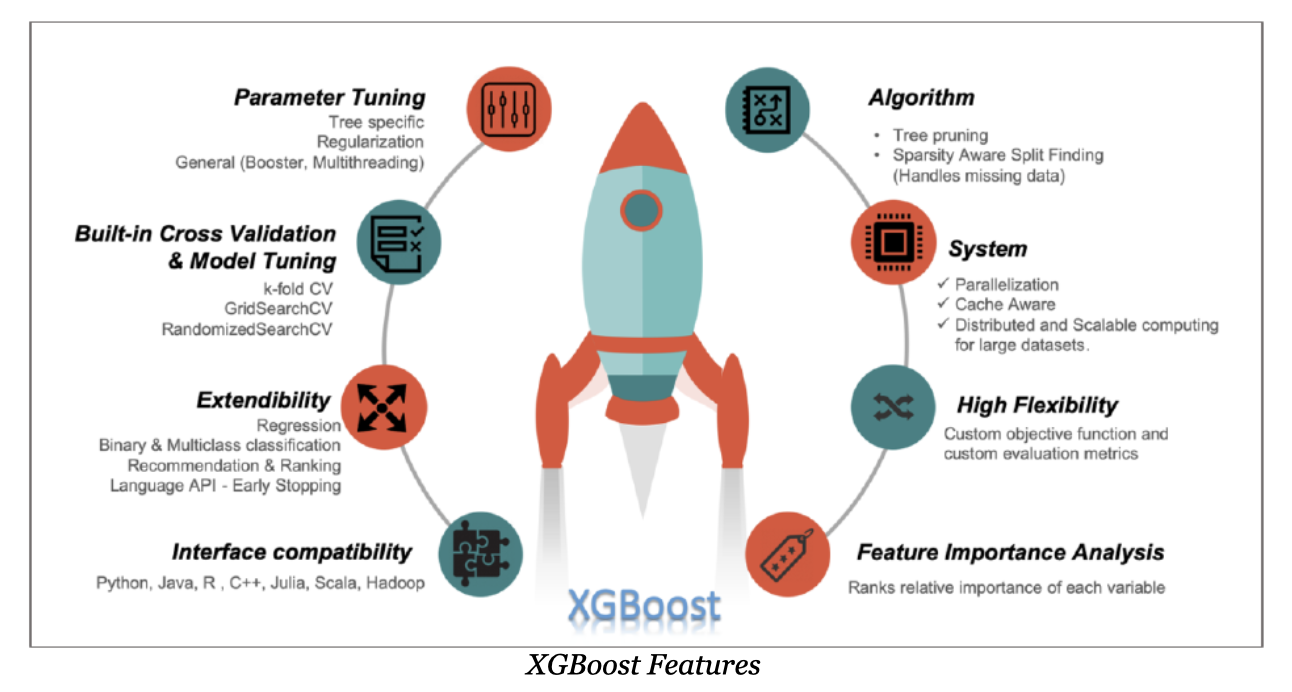

`XGBoost (Extreme Gradient Boosting)` adalah salah satu algoritma ensemble yang menggabungkan banyak model prediksi sederhana (biasanya pohon keputusan) untuk membentuk model yang lebih kuat. XGBoost menggunakan teknik boosting untuk meningkatkan akurasi prediksi dengan cara memperbaiki kesalahan dari model sebelumnya. Berikut adalah langkah-langkah utama dalam cara kerja XGBoost:

1. `Inisialisasi Model Sederhana:`

XGBoost memulai dengan model prediksi sederhana, biasanya berupa pohon keputusan tunggal.
Prediksi awal biasanya berupa rata-rata dari target variabel.

2. `Menghitung Residual:`

Residual adalah selisih antara nilai aktual dan nilai yang diprediksi oleh model saat ini.
Residual ini menunjukkan kesalahan yang dibuat oleh model saat ini.

3. `Membangun Pohon Baru:`

Pohon baru dibangun untuk memprediksi residual dari model sebelumnya.
Pohon ini dilatih untuk fokus pada observasi yang paling sulit diprediksi oleh model sebelumnya.

4. `Update Model:`

Model diperbarui dengan menambahkan pohon baru ke model yang ada.
Setiap pohon baru diberi bobot sehingga model keseluruhan memperbaiki kesalahan dari model sebelumnya.

5. `Iterasi:`

Langkah-langkah di atas diulang berkali-kali. Setiap iterasi menambahkan pohon baru yang memprediksi kesalahan dari model sebelumnya.
Proses ini dilanjutkan hingga jumlah iterasi maksimum tercapai atau hingga kesalahan tidak dapat dikurangi lebih lanjut.

6. `Regularisasi:`

XGBoost menggunakan regularisasi untuk mencegah overfitting. Regularisasi membantu menjaga model tetap sederhana dan menghindari kompleksitas berlebihan.
Dua jenis regularisasi yang digunakan adalah L1 (Lasso) dan L2 (Ridge).

7. `Pembobotan dan Pembaruan Prediksi:`

Setiap pohon baru yang ditambahkan memiliki bobot yang menentukan kontribusinya terhadap prediksi akhir.
Prediksi akhir adalah kombinasi dari prediksi semua pohon, dengan bobot yang diberikan pada setiap pohon.

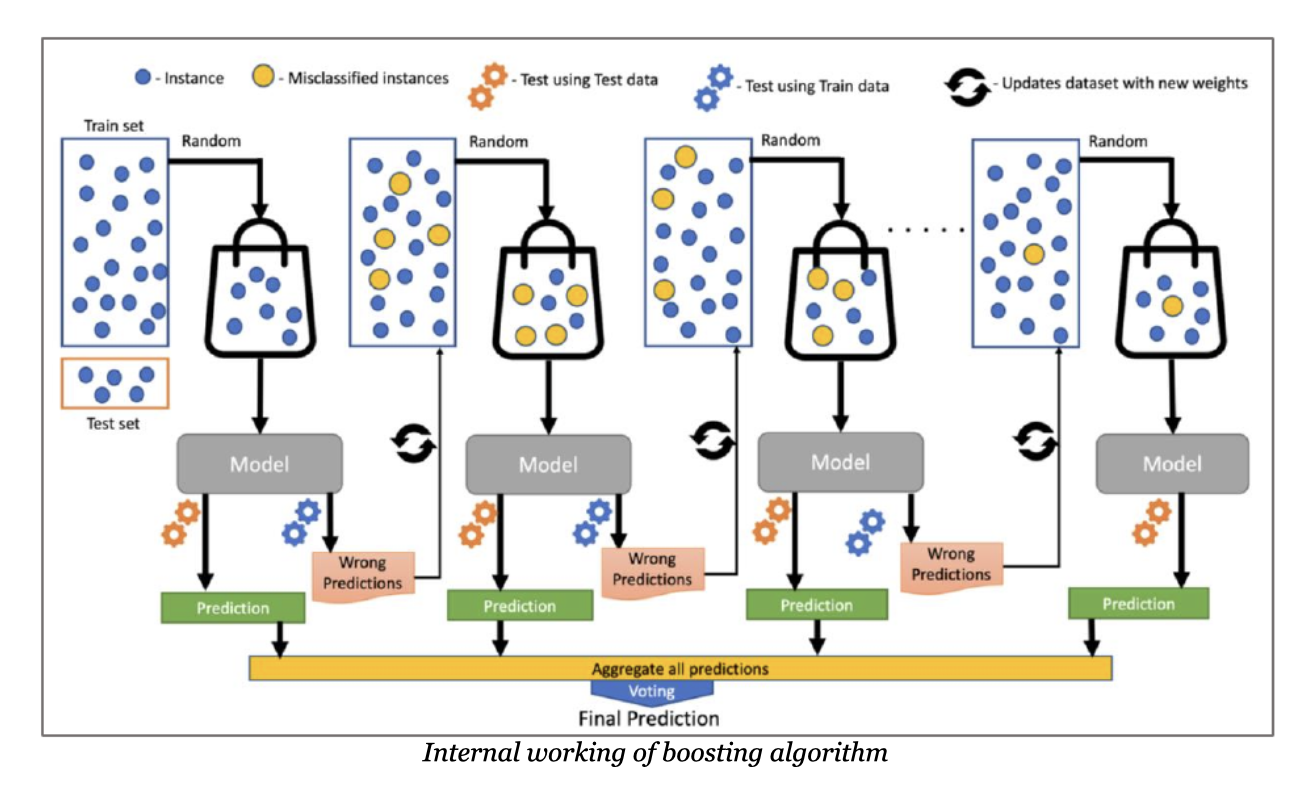

Source: https://www.researchgate.net/publication/339499154_XGBoost_A_Deep_Dive_into_Boosting_Introduction_Documentation

# Limitation Model

Model limitation adalah penentuan batasan-batasan yang melekat pada suatu model, yang dapat mempengaruhi kinerja dan kemampuan model tersebut. Memahami keterbatasan-keterbatasan ini sangat penting karena dapat membantu dalam merencanakan penggunaan model dengan lebih efektif dan realistis.

- **Limitasi pada final model yang digunakan sebagai berikut :**

    | **Fitur** | **Tipe Data** | **Limitasi** | 
    | --- | --- | --- |
    | HallwayType | Object | Menggunakan semua data unik kolom (3 tipe koridor) |
    | TimeToSubway | Object | Menggunakan semua data unik kolom (5 jenis waktu) |
    | SubwayStation | Object | Menggunakan semua data unik kolom (8 station) |
    | N_FacilitiesNearBy(ETC) | Float | Menggunakan semua data unik kolom (4 values) |
    | N_FacilitiesNearBy(PublicOffice) | Float | Menggunakan semua data unik kolom (8 values) |
    | N_SchoolNearBy(PublicOffice) | Float | Menggunakan semua data unik kolom (6 values) |
    | N_Parkinglot(Basement) | Float | Menggunakan semua data unik kolom (20 values) |
    | YearBuilt | Integer | Menggunakan semua data dari tahun 1980 - 2015 (16 values) |
    | N_FacilitiesInApt | Integer | Menggunakan semua data unik kolom (9 values) |
    | Size(sqf) | Integer | Menggunakan semua data unik kolom (89 values) |
    | SalePrice | Integer | Menggunakan semua data unik kolom (838 values) |
&ensp;

In [157]:
y_test = np.array(y_test).flatten()
y_pred_xgb_tuning = np.array(y_pred_xgb_tuning).flatten()


def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (abs(y_true - y_pred) / y_true).mean()

list_mae = []
list_mape = []
nrow = []

price_ranges = [(0, 100000), (100000, 200000), (200000, 300000), (300000, 400000), (500000, float('inf'))]

for price_range in price_ranges:
    min_price, max_price = price_range
    data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_xgb_tuning})
    data = data[(data['y_test'] >= min_price) & (data['y_test'] < max_price)]
    nrow.append(len(data))
    mae = mean_absolute_error(data['y_test'], data['y_pred'])  # Menggunakan mean_absolute_error dari library sklearn
    mape = mean_absolute_percentage_error(data['y_test'], data['y_pred'])  # Calculate MAPE
    list_mae.append(mae)
    list_mape.append(mape)

result_df = pd.DataFrame({
    'Range Harga': [f'{min_price}-{max_price}' for min_price, max_price in price_ranges],
    'Jumlah Data': nrow,
    'MAE': list_mae,
    'MAPE (%)': list_mape  # Display MAPE as a percentage
})

print(result_df)


     Range Harga  Jumlah Data           MAE   MAPE (%)
0       0-100000           60  27131.229036  37.146475
1  100000-200000          163  38054.773342  24.708648
2  200000-300000          177  34043.691826  13.903801
3  300000-400000          104  51231.795222  14.955705
4     500000-inf            3  78178.187500  14.816257


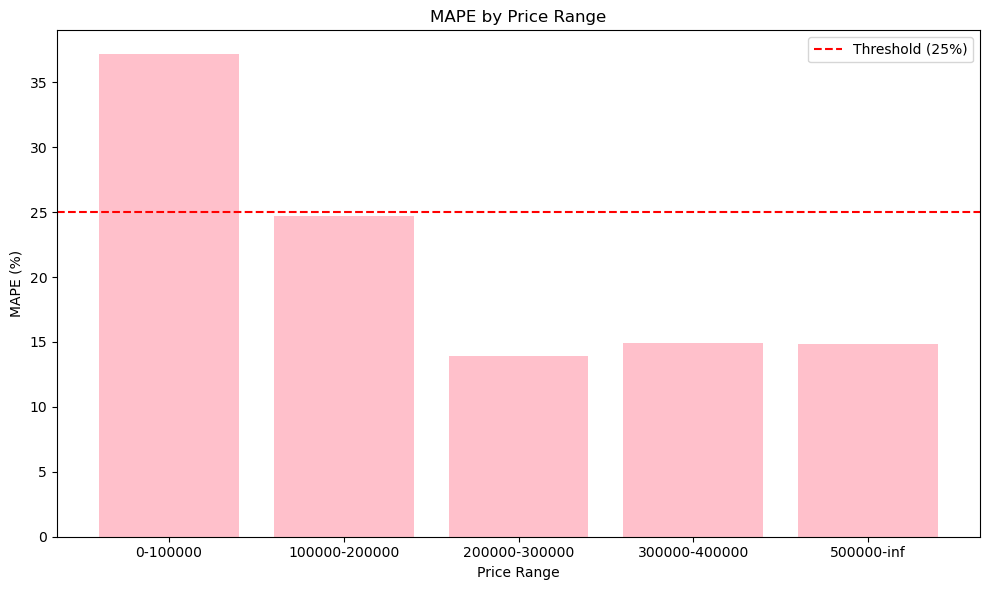

In [162]:
range_harga = result_df['Range Harga']
mape_percentage = result_df['MAPE (%)']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range_harga, mape_percentage, color='Pink')
plt.xlabel('Price Range')
plt.ylabel('MAPE (%)')
plt.title('MAPE by Price Range')


plt.axhline(y=25, color='red', linestyle='--', label='Threshold (25%)')

# Show the plot
plt.tight_layout()
plt.legend()
plt.show()


Grafik MAPE untuk prediksi harga apartemen di Daegu dengan model XGB menunjukkan bahwa model memiliki akurasi terendah pada rentang harga `0-100.000 WON` dengan MAPE sekitar `36%`, dan rentang harga `100.000-200.000 WON `dengan MAPE sedikit di bawah `30%`. Namun, akurasi model meningkat secara signifikan untuk harga `200.000-300.000 WON` dengan MAPE sekitar `16%`, `300.000-400.000 WON`sekitar `17%`, dan untuk harga `> 500.000 WON`  sekitar `18%`, semua berada di bawah ambang batas 25%. Ini menunjukkan bahwa model lebih akurat untuk apartemen dengan harga di atas `200.000 WON`.

- `Akurasi Model:`

Model prediksi XGB lebih akurat untuk rentang harga apartemen di atas 200000. Akurasi model memburuk secara signifikan untuk apartemen dengan harga di bawah 200000.
Performa Terhadap Threshold:

Model tidak memenuhi ambang batas akurasi 25% untuk apartemen dengan harga di bawah 200000. Namun, untuk apartemen dengan harga di atas 200000, model menunjukkan performa yang cukup baik dengan MAPE di bawah 25%.

- `Rekomendasi:`

Perlu dilakukan perbaikan atau tuning lebih lanjut pada model untuk meningkatkan akurasi prediksi pada apartemen dengan harga di bawah 200000.
Grafik ini memberikan pandangan yang jelas mengenai keterbatasan dan kekuatan model XGB dalam memprediksi harga apartemen berdasarkan rentang harga yang berbeda di Daegu.

# Conclusion

> Model terbaik yang diperoleh selama proses pemodelan untuk memprediksi harga sewa apartemen adalah model `Gradient Boosting.`
> Berdasarkan pemodelan dengan Gradient Boosting yang sudah dilakukan hyperparameter tuning, fitur `HallwayType` dan `N_FacilitiesNearBy(ETC)` menjadi fitur yang paling berpengaruh terhadap `SalePrice`.

> Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~19%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga apartment baru di Daegu, Korea Selatan pada rentang nilai seperti yang dilatih terhadap model (minimal `32743 won` dan maksimal harga `585840 Won`), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar `20%` dari harga seharusnya. 
 
> Melalui penggunaan model Gradient Boosting, tingkat kesalahan prediksi (MAPE) dapat diperkecil sebesar 9.83% dibandingkan dengan model Rule Based. Dengan MAPE sebesar 18.56%, model Gradient Boosting menawarkan akurasi prediksi yang lebih baik, yang memiliki implikasi positif bagi perusahaan.

> Dalam konteks bisnis, keakuratan prediksi harga apartemen memiliki dampak yang signifikan. Dengan menggunakan model machine learning yang lebih canggih, seperti Gradient Boosting, perusahaan dapat mengoptimalkan penetapan harga, meningkatkan kepuasan pelanggan, dan pada akhirnya, meraih keuntungan yang lebih besar. Ini menegaskan bahwa investasi dalam pengembangan dan penerapan model machine learning adalah langkah yang strategis dan dapat memberikan hasil yang signifikan bagi pertumbuhan dan kesuksesan perusahaan.

> Masih ada kemungkinan harga akan menyimpang dari estimasi karena tingkat bias yang signifikan antara harga aktual dan harga yang diprediksi. Untuk mengatasi ini, kita dapat memperluas jumlah fitur untuk memberikan penjelasan yang lebih mendalam tentang faktor-faktor yang memengaruhi harga.

> Dengan mengadopsi model `XGBoost`, agen properti dapat meningkatkan akurasi prediksi harga properti mereka, yang pada gilirannya dapat meningkatkan kepuasan pelanggan dan meningkatkan reputasi agen. Dengan prediksi yang lebih akurat, agen dapat membuat keputusan yang lebih tepat dan efisien, yang akan menguntungkan bisnis mereka dalam jangka panjang

# Recommendation

## Rekomendasi Bisnis

Berdasarkan hasil evaluasi model prediksi harga properti, model XGBoost (XGB) menunjukkan performa yang jauh lebih baik dibandingkan dengan model berbasis aturan. Dengan tingkat akurasi yang lebih tinggi, agen properti dapat membuat keputusan yang lebih tepat dan efisien, yang pada gilirannya dapat meningkatkan kepuasan pelanggan dan keuntungan agen.

- Adopsi Model XGBoost:

Agen properti disarankan untuk mengadopsi model XGBoost dalam sistem prediksi harga mereka. Model XGBoost memberikan estimasi harga properti yang lebih akurat dan mendekati harga sebenarnya, yang dapat meningkatkan kepuasan pelanggan dan reputasi agen. Selain itu bila dibandingkan dengan Model Rule Based, Model `XGBoost Regressor` memiliki pengurangan kesalahan prediksi, agen properti dapat mengalokasikan sumber daya dengan lebih efisien, mengurangi waktu yang dihabiskan untuk analisis harga, dan fokus pada strategi pemasaran dan penjualan.

**Rekomendasi bisnis dari hasil analisis feature importance dan shap:**

1. Fokus pada Ukuran dan Tahun Dibangun:

Agen properti harus menekankan apartemen yang memiliki ukuran besar dan dibangun lebih baru, karena kedua fitur ini memiliki pengaruh paling signifikan terhadap harga jual.

2. Pentingnya Fasilitas:

Menyoroti keberadaan fasilitas baik di dalam maupun di sekitar apartemen bisa menjadi strategi yang baik untuk meningkatkan nilai jual. Agen bisa merekomendasikan pemilik apartemen untuk menambah fasilitas jika memungkinkan.

3. Pertimbangan Parkir:

Jumlah tempat parkir, khususnya di basement, dapat menjadi nilai tambah yang menarik bagi calon pembeli.

4. Variasi Lorong:

Memahami preferensi pasar terkait jenis lorong tertentu bisa membantu dalam penentuan harga dan pemasaran.

## Rekomendasi Model

1. `Advanced Hyperparameter Tuning:`

- Bayesian Optimization: Pertimbangkan untuk menggunakan teknik optimasi yang lebih canggih seperti Bayesian Optimization (misalnya, dengan library BayesSearchCV dari scikit-optimize) untuk menemukan kombinasi hyperparameter yang lebih optimal.

- Grid Search: Setelah RandomizedSearchCV, lakukan Grid Search pada rentang yang lebih sempit berdasarkan hasil sebelumnya untuk lebih memperbaiki hyperparameter.

2. `Penambahan Fitur yang relevan`

Demi meningkatkan performa model secara signifikan, direkomendasikan untuk mempertimbangkan penambahan fitur yang lebih relevan, seperti:

- Jarak ke Stasiun Kereta Api Terdekat: Jarak apartemen ke stasiun kereta api terdekat, karena aksesibilitas transportasi umum yang baik dapat memengaruhi harga properti.

- Kualitas Bangunan dan Fasilitas: Kondisi fisik bangunan apartemen dan fasilitas interior seperti dapur yang diperbarui atau lantai kayu yang baru, karena ini dapat memberikan nilai tambah signifikan.

- Tingkat Kriminalitas di Lingkungan Sekitar: Tingkat kejahatan di sekitar area apartemen, karena keamanan dan kenyamanan lingkungan dapat memengaruhi persepsi nilai properti.

 Ini dapat mencakup penggabungan data eksternal yang berkaitan atau pembuatan fitur baru yang lebih informatif untuk memperkaya representasi dataset. Dengan demikian, model akan memiliki pemahaman yang lebih mendalam terhadap pola-pola kompleks dalam data, yang dapat menghasilkan prediksi yang lebih akurat.

3. `Pemantauan dan Evaluasi Berkala:`

Penting untuk rutin memantau kinerja model dan melakukan evaluasi terhadapnya. Harga properti dapat mengalami perubahan yang cepat, oleh karena itu pemantauan yang teratur akan membantu dalam mengidentifikasi ketidakcocokan atau penurunan kinerja model sehingga dapat segera diatasi.

# Save Model

In [152]:
xgb_tuning = random_xgb.best_estimator_
xgb_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Size(sqf)', 'YearBuilt',
                                                   'N_FacilitiesInApt',
                                                   'N_FacilitiesNearBy(ETC)',
                                                   'N_Parkinglot(Basement)']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['HallwayType'])])),
                ('model',
                 XGBRegressor(base_score=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.036082917483040905, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=403, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [154]:
import pickle
# Model Pickling
xgb_tuning.fit(X,y) # FINAL MODEL
filename = 'Model Prediksi Harga Apartment.sav'
pickle.dump(xgb_tuning,open(filename,'wb'))


# load model
filename = 'Model Prediksi Harga Apartment.sav'
loaded_model = pickle.load(open(filename,'rb'))